In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from math import sqrt
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("IPL Matches 2008-2020.csv")

In [591]:
df.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [592]:
citydict = (df.loc[df['venue'].isin(df.loc[df['city'].isna(),'venue'].unique()),['venue','city']]
 .dropna().drop_duplicates().set_index('venue')['city'].to_dict())

In [593]:
df['city'] = df['city'].fillna(df['venue'].map(citydict))

In [594]:
df['result_margin'] = df.loc[(~df['result'].isna()),['result_margin']].fillna(0)

In [595]:
df.rename(columns = {'method':'method(D/L)'},inplace = True)

In [596]:
df['method(D/L)']=df['method(D/L)'].fillna(0)

In [597]:
df.loc[df['method(D/L)']=='D/L',['method(D/L)']] = 1

In [598]:
df.dropna(subset = ['player_of_match'],inplace = True)

In [599]:
df.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method(D/L)         object
umpire1             object
umpire2             object
dtype: object

In [600]:
df['neutral_venue'] = df['neutral_venue'].astype('int32')

In [601]:
df['result_margin'] = df['result_margin'].astype('int32')

In [602]:
df['method(D/L)'] = df['method(D/L)'].astype('int32')

In [603]:
df['date'] = pd.to_datetime(df['date'])

#Univariate Analysis

In [604]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method(D/L),umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,0,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,0,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,N,0,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,0,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,N,0,BF Bowden,K Hariharan


In [605]:
df['season'] = df['date'].dt.year

In [606]:
df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru'],
      dtype=object)

In [607]:
df.loc[df['city']=='Bengaluru','city'] = 'Bangalore'

In [21]:
# IPL season data is continous

In [608]:
df['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [ ]:
# 'AB de Villiers' won player_of_match most number of times.

In [609]:
df['player_of_match'].value_counts().sort_values(ascending = False).head(10)

player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: count, dtype: int64

In [610]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [611]:
df.loc[df['venue'] == 'M.Chinnaswamy Stadium','venue'] = 'M Chinnaswamy Stadium'

In [ ]:
# All locations outside india are considered as neutralvenues

In [612]:
df.loc[df['neutral_venue'] == 1,'city'].unique()

array(['Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Abu Dhabi', 'Sharjah', 'Dubai'], dtype=object)

In [ ]:
#Overall,14 IPL teams are present from 2008-present.

In [613]:
df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [614]:
df.loc[df['team1']=='Rising Pune Supergiants',['team1']] = 'Rising Pune Supergiant'

In [615]:
df.loc[df['team2']=='Rising Pune Supergiants',['team2']] = 'Rising Pune Supergiant'

In [616]:
df.loc[df['winner']== 'Rising Pune Supergiants',['winner']] = 'Rising Pune Supergiant'

In [617]:
df.loc[df['toss_winner']== 'Rising Pune Supergiants',['toss_winner']] = 'Rising Pune Supergiant'

In [618]:
df.loc[df['team1'] == 'Delhi Daredevils',['team1']] = 'Delhi Capitals'

In [619]:
df.loc[df['team2'] == 'Delhi Daredevils',['team2']] = 'Delhi Capitals'

In [620]:
df.loc[df['winner'] == 'Delhi Daredevils',['winner']] = 'Delhi Capitals'

In [621]:
df.loc[df['toss_winner'] == 'Delhi Daredevils',['toss_winner']] = 'Delhi Capitals'

In [622]:
f1 = df[['season','team1']].drop_duplicates().rename(columns = {'team1':'team'})
f2 = df[['season','team2']].drop_duplicates().rename(columns = {'team2':'team'})

pd.concat([f1,f2],axis = 0).sort_values(['season'],ascending = [True]).groupby(['team'])['season'].unique()

team
Chennai Super Kings                        [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019, 2020]
Deccan Chargers                                                                [2008, 2009, 2010, 2011, 2012]
Delhi Capitals                 [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Gujarat Lions                                                                                    [2016, 2017]
Kings XI Punjab                [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Kochi Tuskers Kerala                                                                                   [2011]
Kolkata Knight Riders          [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Mumbai Indians                 [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Pune Warriors                                                                              [2011, 2012, 2013]
Rajas

In [ ]:
#CSK,RR did not play in 2016,2017.
KXIP,MI,RCB,KKR,DC played every season.

In [623]:
pd.set_option('display.max_colwidth',100)

In [ ]:
# 60% of the toss winners chose to field first. --- But why?Is there any advantange?

In [624]:
df['toss_decision'].value_counts(normalize = True)

toss_decision
field    0.607143
bat      0.392857
Name: proportion, dtype: float64

In [ ]:
# Mumbai Indians won most of the matches, while CSK not playing two seasons, still managed to come in second place.

In [625]:
df['winner'].value_counts().sort_values(ascending = False)

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Delhi Capitals                  86
Rajasthan Royals                81
Sunrisers Hyderabad             66
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: count, dtype: int64

In [626]:
df['result'].value_counts(normalize = True)

result
wickets    0.535714
runs       0.448276
tie        0.016010
Name: proportion, dtype: float64

In [ ]:
# In most of the matches where second batting team wins

<Axes: xlabel='result_margin', ylabel='Count'>

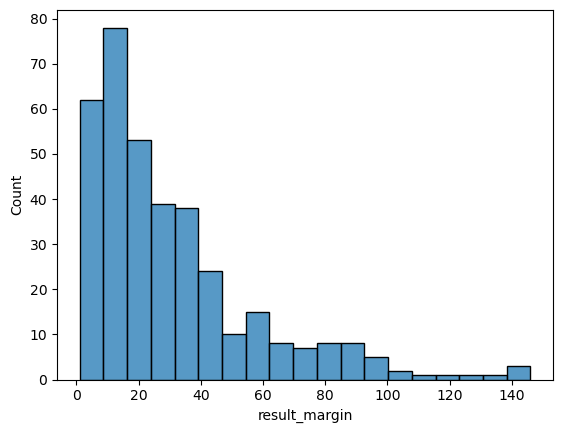

In [627]:
sns.histplot(data = df.loc[df['result']=='runs'],x = 'result_margin')

In [628]:
df.loc[df['result_margin']>100]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method(D/L),umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,0,Asad Rauf,RE Koertzen,2008
55,336038,Mumbai,2008-05-30,SR Watson,Wankhede Stadium,0,Delhi Capitals,Rajasthan Royals,Delhi Capitals,field,Rajasthan Royals,runs,105,N,0,BF Bowden,RE Koertzen,2008
236,501260,Dharamsala,2011-05-17,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,0,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,Kings XI Punjab,runs,111,N,0,Asad Rauf,AM Saheba,2011
351,598027,Bangalore,2013-04-23,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,Royal Challengers Bangalore,runs,130,N,0,Aleem Dar,C Shamshuddin,2013
497,829785,Bangalore,2015-05-06,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Royal Challengers Bangalore,runs,138,N,0,RK Illingworth,VA Kulkarni,2015
560,980987,Bangalore,2016-05-14,AB de Villiers,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,Royal Challengers Bangalore,runs,144,N,0,AY Dandekar,VK Sharma,2016
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,field,Mumbai Indians,runs,146,N,0,Nitin Menon,CK Nandan,2017
676,1136601,Kolkata,2018-05-09,Ishan Kishan,Eden Gardens,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,field,Mumbai Indians,runs,102,N,0,KN Ananthapadmanabhan,AK Chaudhary,2018
706,1175366,Hyderabad,2019-03-31,JM Bairstow,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,118,N,0,KN Ananthapadmanabhan,S Ravi,2019


In [37]:
#all matches which were tie are eliminators acc to data.

In [629]:
df['eliminator'].value_counts()

eliminator
N    799
Y     13
Name: count, dtype: int64

In [630]:
df.loc[df['eliminator'] == 'Y']

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method(D/L),umpire1,umpire2,season
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,0,Y,0,MR Benson,M Erasmus,2009
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,0,Y,0,K Hariharan,DJ Harper,2010
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,0,Y,0,AK Chaudhary,S Ravi,2013
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,0,Y,0,M Erasmus,VA Kulkarni,2013
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,0,Y,0,Aleem Dar,AK Chaudhary,2014
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,0,Y,0,M Erasmus,S Ravi,2015
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,0,Y,0,AK Chaudhary,CB Gaffaney,2017
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,0,Y,0,AY Dandekar,Nitin Menon,2019
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,0,Y,0,CK Nandan,S Ravi,2019
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,0,Y,0,AK Chaudhary,Nitin Menon,2020


In [631]:
df.loc[df['method(D/L)'] == 1]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method(D/L),umpire1,umpire2,season
40,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,runs,6,N,1,AV Jayaprakash,RE Koertzen,2008
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3,N,1,Asad Rauf,K Hariharan,2008
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Capitals,Kings XI Punjab,Delhi Capitals,field,Delhi Capitals,wickets,10,N,1,MR Benson,SD Ranade,2009
63,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11,N,1,DJ Harper,SD Ranade,2009
89,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12,N,1,DJ Harper,TH Wijewardene,2009
192,501215,Kochi,2011-04-18,BB McCullum,Nehru Stadium,0,Kochi Tuskers Kerala,Chennai Super Kings,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,7,N,1,K Hariharan,AL Hill,2011
221,501245,Kolkata,2011-05-07,Iqbal Abdulla,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,runs,10,N,1,Asad Rauf,PR Reiffel,2011
231,501255,Bangalore,2011-05-14,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4,N,1,RE Koertzen,RB Tiffin,2011
429,733993,Delhi,2014-05-10,DW Steyn,Feroz Shah Kotla,0,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8,N,1,RM Deshpande,BNJ Oxenford,2014
477,829743,Visakhapatnam,2015-04-22,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,runs,16,N,1,RK Illingworth,VA Kulkarni,2015


In [632]:
df.loc[df['neutral_venue'] == 1,'season'].unique()

array([2009, 2014])

In [633]:
df.loc[df['season']==2020,['neutral_venue']] = 1

In [ ]:
#set the neutral venue to 1 in 2020 as it took place out of india.

In [40]:
#Multivariate analysis

In [634]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method(D/L),umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,0,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,0,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,N,0,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,0,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,N,0,BF Bowden,K Hariharan,2008


In [635]:
playoffs = df.sort_values(['date'],ascending = [False]).groupby(['season']).head(4)
playoffs = (playoffs[~playoffs['date'].isin(playoffs[playoffs['season'].isin([2008,2009])].groupby(['season'])['date'].min())]
           .reset_index(drop=True))

remmatches = df[~(df['date'].isin(playoffs['date']))]

In [636]:
len(playoffs),len(df),len(remmatches)

(50, 812, 762)

In [637]:
team1 = playoffs[['season','team1']].drop_duplicates().rename(columns = {'team1':'team'})
team2 = playoffs[['season','team2']].drop_duplicates().rename(columns = {'team2':'team'})

playoffteams = pd.concat([team1,team2],axis = 0).drop_duplicates().sort_values(['season'],ascending = [True])

In [638]:
matcheswondf = (remmatches.groupby(['season','winner'])['id'].count().reset_index()
                .rename(columns = {'id':'wincount','winner':'team'}))
#excluding playoffs

In [639]:
playoffteams = (pd.merge(playoffteams,matcheswondf,how = 'inner',left_on = ['season','team'],right_on = ['season','team'])
                )

In [640]:
matcheswondf.pivot_table(index = 'team',
                         columns = 'season',
                         values = 'wincount')

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
team,,,,,,,,,,,,,
Chennai Super Kings,8.0,8.0,7.0,9.0,8.0,11.0,9.0,9.0,NaN,NaN,9.0,9.0,6.0
Deccan Chargers,2.0,7.0,8.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delhi Capitals,7.0,10.0,7.0,4.0,11.0,3.0,2.0,5.0,7.0,6.0,5.0,9.0,8.0
Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,4.0,NaN,NaN,NaN
Kings XI Punjab,10.0,7.0,4.0,7.0,8.0,8.0,11.0,3.0,4.0,7.0,6.0,6.0,6.0
Kochi Tuskers Kerala,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kolkata Knight Riders,6.0,3.0,7.0,8.0,10.0,6.0,9.0,7.0,8.0,8.0,8.0,6.0,7.0
Mumbai Indians,7.0,5.0,10.0,9.0,10.0,11.0,7.0,8.0,7.0,10.0,6.0,9.0,9.0
Pune Warriors,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [641]:
playoffteams.groupby(['team'])['season'].unique()

team
Chennai Super Kings            [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019]
Deccan Chargers                                                                [2009, 2010]
Delhi Capitals                                               [2008, 2009, 2012, 2019, 2020]
Gujarat Lions                                                                        [2016]
Kings XI Punjab                                                                [2008, 2014]
Kolkata Knight Riders                                  [2011, 2012, 2014, 2016, 2017, 2018]
Mumbai Indians                       [2010, 2011, 2012, 2013, 2014, 2015, 2017, 2019, 2020]
Rajasthan Royals                                                   [2008, 2013, 2015, 2018]
Rising Pune Supergiant                                                               [2017]
Royal Challengers Bangalore                            [2009, 2010, 2011, 2015, 2016, 2020]
Sunrisers Hyderabad                                    [2013, 2016, 2017, 2

In [ ]:
#CSK,MI showed a consistent performance among all IPL teams
#MI started performing well from 2010.
#Delhi Capitals was the lowest performer in 2013,2014 with only 2-3 matches winning.
#KXIP only qualified to playoffs in two seasons.
#KKR performance was very low in 2009.
#Pune Warriors showed a poor performance in all the three seasons it played.
#SRH,qualified in 6 out of 8 seasons it played.

In [642]:
playoffteams.groupby(['season']).agg(minmatcheswon=('wincount','min'),maxmatcheswon = ('wincount','max'))

,minmatcheswon,maxmatcheswon
season,,
2008,7,11
2009,7,10
2010,7,10
2011,8,9
2012,8,11
2013,10,11
2014,7,11
2015,7,9
2016,8,9


In [ ]:
#Teams need to win minimum of 7 matches on avg to qualify for playoffs. 
In 2013, all teams played well increasing the minimum to 11.  --- Why teams played well in 2013?

In [643]:
playoffteams.groupby(['season'])['team'].unique()

season
2008                     [Kings XI Punjab, Rajasthan Royals, Chennai Super Kings, Delhi Capitals]
2009          [Royal Challengers Bangalore, Delhi Capitals, Deccan Chargers, Chennai Super Kings]
2010          [Mumbai Indians, Deccan Chargers, Royal Challengers Bangalore, Chennai Super Kings]
2011    [Mumbai Indians, Royal Challengers Bangalore, Chennai Super Kings, Kolkata Knight Riders]
2012                 [Mumbai Indians, Delhi Capitals, Kolkata Knight Riders, Chennai Super Kings]
2013                 [Chennai Super Kings, Mumbai Indians, Rajasthan Royals, Sunrisers Hyderabad]
2014                [Chennai Super Kings, Kolkata Knight Riders, Mumbai Indians, Kings XI Punjab]
2015         [Royal Challengers Bangalore, Chennai Super Kings, Mumbai Indians, Rajasthan Royals]
2016     [Royal Challengers Bangalore, Gujarat Lions, Sunrisers Hyderabad, Kolkata Knight Riders]
2017         [Sunrisers Hyderabad, Kolkata Knight Riders, Rising Pune Supergiant, Mumbai Indians]
2018         

In [644]:
minmatwontm = (pd.merge(playoffteams.groupby(['season'])['wincount'].min().reset_index(),matcheswondf,how = 'inner',
          left_on = ['season','wincount'],right_on = ['season','wincount']))  #teams that won min matches in each season

#excule 2011,2013,2016,2017,2018 -- as they cannot be utilised to analyse runrate advantage.

minmatwontm = minmatwontm[~minmatwontm['season'].isin([2011,2013,2016,2017,2018])]

In [645]:
minmatwontm

,season,wincount,team
0,2008,7,Delhi Capitals
1,2008,7,Mumbai Indians
2,2009,7,Deccan Chargers
3,2009,7,Kings XI Punjab
4,2010,7,Chennai Super Kings
5,2010,7,Delhi Capitals
6,2010,7,Kolkata Knight Riders
7,2010,7,Royal Challengers Bangalore
9,2012,8,Chennai Super Kings
10,2012,8,Kings XI Punjab


In [646]:
(minmatwontm[(minmatwontm['season'].astype('str') + minmatwontm['team']).isin(playoffteams['season'].astype('str')
                +playoffteams['team'])])   

#This df shows the teams which were qualified to playoffs because of better run rate.

,season,wincount,team
0,2008,7,Delhi Capitals
2,2009,7,Deccan Chargers
4,2010,7,Chennai Super Kings
7,2010,7,Royal Challengers Bangalore
9,2012,8,Chennai Super Kings
14,2014,7,Mumbai Indians
17,2015,7,Rajasthan Royals
18,2015,7,Royal Challengers Bangalore
28,2019,6,Sunrisers Hyderabad
30,2020,7,Royal Challengers Bangalore


In [647]:
(minmatwontm[~(minmatwontm['season'].astype('str') + minmatwontm['team']).isin(playoffteams['season'].astype('str')
                +playoffteams['team'])])   

#These are the teams which won min matches req for qualifying to playoffs (i.e.,had tie with other teams which won same matches)
# in that particular season but didnt qualify because of low run rate.
                               

,season,wincount,team
1,2008,7,Mumbai Indians
3,2009,7,Kings XI Punjab
5,2010,7,Delhi Capitals
6,2010,7,Kolkata Knight Riders
10,2012,8,Kings XI Punjab
11,2012,8,Royal Challengers Bangalore
15,2014,7,Rajasthan Royals
16,2015,7,Kolkata Knight Riders
19,2015,7,Sunrisers Hyderabad
26,2019,6,Kings XI Punjab


In [ ]:
#KXIP having played in all seasons since 2008, and only qualified 2 times for playoffs - neither won more no of matches nor
has high run rate compared to other teams -- coz from above, it failed to qualify 3 times because of runrate.
--Weak performed team

In [649]:
matcheswondf[matcheswondf['team'] == 'Kolkata Knight Riders']

#KKR failed to qualify for playoffs in 4 seasons (2010,2015,2019,2020) due to low runrate, From below, you can see that all the
# seasons in which it got qualified(2011,2012,2014,2016,2018) was due to it winning more no of matches.

,season,team,wincount
4,2008,Kolkata Knight Riders,6
12,2009,Kolkata Knight Riders,3
20,2010,Kolkata Knight Riders,7
29,2011,Kolkata Knight Riders,8
38,2012,Kolkata Knight Riders,10
46,2013,Kolkata Knight Riders,6
55,2014,Kolkata Knight Riders,9
63,2015,Kolkata Knight Riders,7
71,2016,Kolkata Knight Riders,8
79,2017,Kolkata Knight Riders,8


In [116]:
#If we analyse the teams qualified over run-rate advantage,only RCB had that advantage as it got qualified 3 times.

In [650]:
playoffteams.sort_values(['season','wincount'],ascending = [True,True])

,season,team,wincount
3,2008,Delhi Capitals,7
2,2008,Chennai Super Kings,8
0,2008,Kings XI Punjab,10
1,2008,Rajasthan Royals,11
6,2009,Deccan Chargers,7
4,2009,Royal Challengers Bangalore,8
7,2009,Chennai Super Kings,8
5,2009,Delhi Capitals,10
10,2010,Royal Challengers Bangalore,7
11,2010,Chennai Super Kings,7


In [651]:
finalmatch = playoffs.loc[playoffs['date'].isin(playoffs.groupby(['season'])['date'].max()),['season','team1','team2','winner']]
finalmatch['runner'] = np.where(finalmatch['team1']==finalmatch['winner'],finalmatch['team2'],finalmatch['team1'])
winners = finalmatch[['season','winner']].rename(columns = {'winner':'team'})
winners['position'] = 1
runners = finalmatch[['season','runner']].rename(columns = {'runner':'team'})
runners['position'] = 2
topfourteams = pd.concat([winners,runners],axis = 0)

#extracting IPL winners,runners.

In [652]:
topfourteams

,season,team,position
0,2020,Mumbai Indians,1
4,2019,Mumbai Indians,1
8,2018,Chennai Super Kings,1
12,2017,Mumbai Indians,1
16,2016,Sunrisers Hyderabad,1
20,2015,Mumbai Indians,1
24,2014,Kolkata Knight Riders,1
28,2013,Mumbai Indians,1
32,2012,Kolkata Knight Riders,1
36,2011,Chennai Super Kings,1


In [658]:
playoffsdummy = playoffs[['season','city','date','team1','team2','winner']]
playoffsdummy['rank'] = playoffsdummy.groupby(['season'])['date'].transform('rank')
playoffsdummy

C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_14264\4194388232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playoffsdummy['rank'] = playoffsdummy.groupby(['season'])['date'].transform('rank')


,season,city,date,team1,team2,winner,rank
0,2020,Dubai,2020-11-10,Delhi Capitals,Mumbai Indians,Mumbai Indians,4.0
1,2020,Abu Dhabi,2020-11-08,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,3.0
2,2020,Abu Dhabi,2020-11-06,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,2.0
3,2020,Dubai,2020-11-05,Mumbai Indians,Delhi Capitals,Mumbai Indians,1.0
4,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,4.0
5,2019,Visakhapatnam,2019-05-10,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,3.0
6,2019,Visakhapatnam,2019-05-08,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,2.0
7,2019,Chennai,2019-05-07,Mumbai Indians,Chennai Super Kings,Mumbai Indians,1.0
8,2018,Mumbai,2018-05-27,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,4.0
9,2018,Kolkata,2018-05-25,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,3.0


In [660]:
playoffteams

,season,team,wincount
0,2008,Kings XI Punjab,10
1,2008,Rajasthan Royals,11
2,2008,Chennai Super Kings,8
3,2008,Delhi Capitals,7
4,2009,Royal Challengers Bangalore,8
5,2009,Delhi Capitals,10
6,2009,Deccan Chargers,7
7,2009,Chennai Super Kings,8
8,2010,Mumbai Indians,10
9,2010,Deccan Chargers,8


In [666]:
fourthposition = (playoffsdummy[((playoffsdummy['season']>=2011)&(playoffsdummy['rank'] == 2)) |
                                ((playoffsdummy['season'] == 2010) & (playoffsdummy['rank'] == 3)) |
                                ((playoffsdummy['season'].isin([2008])) & (playoffsdummy['rank'] == 1))])
fourthposition['loser'] = (np.where(fourthposition['team1'] == fourthposition['winner'],fourthposition['team2'],
                                    fourthposition['team1']))
fourthposition = fourthposition[['season','loser']].rename(columns = {'loser':'team'})
fourthposition.loc[len(fourthposition.index)] = [2009,'Chennai Super Kings']
fourthposition['position'] = 4


C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_14264\3786272415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourthposition['loser'] = (np.where(fourthposition['team1'] == fourthposition['winner'],fourthposition['team2'],


In [669]:
thirdposition = (playoffsdummy[((playoffsdummy['season']>=2011)&(playoffsdummy['rank'] == 3)) |
                                ((playoffsdummy['season'] == 2010) & (playoffsdummy['rank'] == 3)) |
                                ((playoffsdummy['season'].isin([2008])) & (playoffsdummy['rank'] == 2))])

thirdposition['thirdteam'] = (np.where(thirdposition['season'] != 2010,np.where(thirdposition['team1'] == 
                              thirdposition['winner'],thirdposition['team2'],thirdposition['team1']),
                              thirdposition['winner']))
thirdposition = thirdposition[['season','thirdteam']].rename(columns = {'thirdteam':'team'})
thirdposition.loc[len(thirdposition.index)] = [2009,'Delhi Capitals']
thirdposition['position'] = 3

C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_14264\2534100888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirdposition['thirdteam'] = (np.where(thirdposition['season'] != 2010,np.where(thirdposition['team1'] ==


In [138]:
#In 2008,2009 - qualifiers are conducted in this way: 1st vs 4th; 2nd vs 3rd; winner vs winner;
#In 2010 - 1st vs 4th; 2nd vs 3rd; loser vs loser (for 3rd place); winner vs winner;
#From 2011 - 1st vs 2nd; 3rd vs 4th; loser(of 1st vs 2nd) vs winner(of 3rd vs 4th); winner vs winner(of 1st vs 2nd);

In [675]:
topfour = (pd.concat([topfourteams,thirdposition,fourthposition],axis= 0)).reset_index(drop = True)

In [673]:
topfour[topfour['position'] == 1] #winners of each season

,season,team,position
0,2020,Mumbai Indians,1
4,2019,Mumbai Indians,1
8,2018,Chennai Super Kings,1
12,2017,Mumbai Indians,1
16,2016,Sunrisers Hyderabad,1
20,2015,Mumbai Indians,1
24,2014,Kolkata Knight Riders,1
28,2013,Mumbai Indians,1
32,2012,Kolkata Knight Riders,1
36,2011,Chennai Super Kings,1


In [ ]:
#MI won the title most of the times, followed by CSK.
RCB never won the title even once if it qualified many times.

In [677]:
topfour.groupby(['team','position'])['season'].count()

team                         position
Chennai Super Kings          1           3
                             2           5
                             3           1
                             4           1
Deccan Chargers              1           1
                             4           1
Delhi Capitals               2           1
                             3           3
                             4           1
Gujarat Lions                3           1
Kings XI Punjab              2           1
                             3           1
Kolkata Knight Riders        1           2
                             3           2
                             4           2
Mumbai Indians               1           5
                             2           1
                             3           1
                             4           2
Rajasthan Royals             1           1
                             3           1
                             4           2
Rising Pune Supe

In [678]:
# we are adding loser column to the playoffsdummy df -- to analyse if any team lost more matches against some team.
playoffsdummy['loser'] = (np.where(playoffsdummy['team1'] == playoffsdummy['winner'],playoffsdummy['team2'],
                                   playoffsdummy['team1']))

playoffsdummy.groupby(['loser','winner'])['season'].count()

C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_14264\3399190993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playoffsdummy['loser'] = (np.where(playoffsdummy['team1'] == playoffsdummy['winner'],playoffsdummy['team2'],


loser                        winner                     
Chennai Super Kings          Kings XI Punjab                1
                             Kolkata Knight Riders          1
                             Mumbai Indians                 5
                             Rajasthan Royals               1
                             Royal Challengers Bangalore    1
Deccan Chargers              Chennai Super Kings            1
                             Royal Challengers Bangalore    1
Delhi Capitals               Chennai Super Kings            2
                             Deccan Chargers                1
                             Kolkata Knight Riders          1
                             Mumbai Indians                 2
                             Rajasthan Royals               1
Gujarat Lions                Royal Challengers Bangalore    1
                             Sunrisers Hyderabad            1
Kings XI Punjab              Chennai Super Kings            1
             

In [ ]:
#MI & CSK are strong opponent teams for each other. For remaining teams, we dont find any particular pattern. But for RCB,
it lost against CSK,SRH - though it doesn't seem very odd, maybe its better to analyse if we analyse the matches between
RCB vs SRH & RCB vs CSK.

In [682]:
mask = (((remmatches['team1'] == 'Royal Challengers Bangalore') & (remmatches['team2'].isin(['Sunrisers Hyderabad','Chennai Super Kings']))) |
       ((remmatches['team2'] == 'Royal Challengers Bangalore') & (remmatches['team1'].isin(['Sunrisers Hyderabad','Chennai Super Kings']))))

RCBanalysis = remmatches.loc[mask,['season','city','team1','team2','winner']]

In [683]:
RCBanalysis['loser'] = (np.where(RCBanalysis['team1'] == RCBanalysis['winner'],RCBanalysis['team2'],
                                   RCBanalysis['team1']))

In [684]:
RCBanalysis.groupby(['loser','winner'])['season'].count()

loser                        winner                     
Chennai Super Kings          Royal Challengers Bangalore     8
Royal Challengers Bangalore  Chennai Super Kings            13
                             Sunrisers Hyderabad             8
Sunrisers Hyderabad          Royal Challengers Bangalore     7
Name: season, dtype: int64

In [685]:
mask = (((remmatches['team1'] == 'Royal Challengers Bangalore') & ~(remmatches['team2'].isin(['Sunrisers Hyderabad','Chennai Super Kings']))) |
       ((remmatches['team2'] == 'Royal Challengers Bangalore') & ~(remmatches['team1'].isin(['Sunrisers Hyderabad','Chennai Super Kings']))))

RCBanalysisother = remmatches.loc[mask,['season','city','team1','team2','winner']]
RCBanalysisother['loser'] = (np.where(RCBanalysisother['team1'] == RCBanalysisother['winner'],RCBanalysisother['team2'],
                                   RCBanalysisother['team1']))

In [686]:
RCBanalysisother.groupby(['loser','winner'])['season'].count()

loser                        winner                     
Deccan Chargers              Royal Challengers Bangalore     4
Delhi Capitals               Royal Challengers Bangalore    14
Gujarat Lions                Royal Challengers Bangalore     2
Kings XI Punjab              Royal Challengers Bangalore    12
Kochi Tuskers Kerala         Royal Challengers Bangalore     2
Kolkata Knight Riders        Royal Challengers Bangalore    12
Mumbai Indians               Royal Challengers Bangalore     9
Pune Warriors                Royal Challengers Bangalore     5
Rajasthan Royals             Royal Challengers Bangalore     9
Rising Pune Supergiant       Royal Challengers Bangalore     2
Royal Challengers Bangalore  Deccan Chargers                 5
                             Delhi Capitals                 10
                             Gujarat Lions                   2
                             Kings XI Punjab                14
                             Kolkata Knight Riders          1

In [169]:
# AS we can see from above, our assumption of RCB losing more matches with CSK,SRH is not true as it lost almost same no of
matches against other teams too.

In [ ]:
#Let us find if there is any relation between toss_decision and matchoutput. Before diving in, let us rename few stadiums which
are same but has multiplenames.

In [687]:
df.loc[df['venue'] == 'Punjab Cricket Association IS Bindra Stadium, Mohali','venue'] = 'Punjab Cricket Association Stadium, Mohali'
df.loc[df['venue'] == 'Maharashtra Cricket Association Stadium','venue'] = 'Subrata Roy Sahara Stadium'

In [688]:
tossanalysis = df[['season','venue','city','team1','team2','toss_winner','toss_decision','winner']]

In [689]:
tossanalysis['tosswinnerstatus'] = np.where(tossanalysis['toss_winner'] == tossanalysis['winner'],1,0)

C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_14264\259225751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tossanalysis['tosswinnerstatus'] = np.where(tossanalysis['toss_winner'] == tossanalysis['winner'],1,0)


In [690]:
contingencytable = pd.crosstab(tossanalysis['tosswinnerstatus'],tossanalysis['toss_decision'])
pvalue = stats.chi2_contingency(contingencytable)[1]
print(pvalue) 
#pvalue < 0.05, So we can say toss_decision affects matchoutput.

0.007131953859850402


In [691]:
pd.crosstab(tossanalysis['tosswinnerstatus'],tossanalysis['toss_decision'],normalize = True)

toss_decision,bat,field
tosswinnerstatus,,
0,0.214286,0.270936
1,0.178571,0.336207


In [ ]:
#But,is this applicable for every IPL team? Let us see for each team, if their matchoutput is based on tossdecision, i.e,
batting or fielding first.For this analysis, we need to consider the cases where the respective team lost of toss
too.

In [692]:
tossanalysis['tossloser'] = np.where(tossanalysis['team1'] == tossanalysis['toss_winner'],tossanalysis['team2'],
                                      tossanalysis['team1'])

tossanalysis['tossloserdecision'] = np.where(tossanalysis['toss_decision'] == 'bat','field','bat')
tossanalysis['tossloserstatus'] = np.where(tossanalysis['tossloser'] == tossanalysis['winner'],1,0)

C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_14264\1694306051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tossanalysis['tossloser'] = np.where(tossanalysis['team1'] == tossanalysis['toss_winner'],tossanalysis['team2'],
C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_14264\1694306051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tossanalysis['tossloserdecision'] = np.where(tossanalysis['toss_decision'] == 'bat','field','bat')
C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_14264\

In [693]:
tosswincase = (tossanalysis[['toss_winner','toss_decision','tosswinnerstatus']].rename(columns = {'toss_winner':'team',
                            'tosswinnerstatus':'matchoutput'}))

tosslosecase = (tossanalysis[['tossloser','tossloserdecision','tossloserstatus']].rename(columns = {'tossloser':'team',
                            'tossloserdecision':'toss_decision','tossloserstatus':'matchoutput'}))

teamtossanalysis = pd.concat([tosswincase,tosslosecase],axis = 0)

In [694]:
teams = teamtossanalysis['team'].unique()
finallist = []
for i in teams:
    filtereddf = teamtossanalysis[teamtossanalysis['team'] == i]
    contingencytable = pd.crosstab(filtereddf['matchoutput'],filtereddf['toss_decision'])
    print(i,contingencytable)
    pvalue = stats.chi2_contingency(contingencytable)[1]
    finallist.append([i,pvalue])

print(pd.DataFrame(finallist,columns = ['team','pvalue']))

Royal Challengers Bangalore toss_decision  bat  field
matchoutput              
0               54     47
1               39     52
Chennai Super Kings toss_decision  bat  field
matchoutput              
0               41     31
1               52     54
Rajasthan Royals toss_decision  bat  field
matchoutput              
0               41     37
1               30     51
Mumbai Indians toss_decision  bat  field
matchoutput              
0               47     36
1               63     57
Deccan Chargers toss_decision  bat  field
matchoutput              
0               25     21
1               18     11
Kings XI Punjab toss_decision  bat  field
matchoutput              
0               57     45
1               40     48
Kolkata Knight Riders toss_decision  bat  field
matchoutput              
0               53     40
1               40     59
Delhi Capitals toss_decision  bat  field
matchoutput              
0               52     54
1               35     51
Kochi Tuskers Keral

In [ ]:
#From above, we can say that for RR and KKR, matchoutput is affected by toss_decision.
Both RR,KKR has more chance of losing matches when chose to bat first and more chance of winning on choosing to field first.

Coming to Gujarat Lions, if we look into contingency table, each category should have minimum of count 5 to proceed with
chi-square test. But there is a huge difference in the count based on tossdecision, it lost 13 matches out of 14 on choosing to
bat first. So, we can say GL output also affected by tossdecision

In [ ]:
#let us explore if this is the trend which was followed in tosswinners case which we initially used to test dependence of
matchoutput on tossdecision

In [695]:
teams = tossanalysis['toss_winner'].unique()
finallist = []
for i in teams:
    filtereddf = tossanalysis[tossanalysis['toss_winner'] == i]
    contingencytable = pd.crosstab(filtereddf['tosswinnerstatus'],filtereddf['toss_decision'])
    print(i,contingencytable)
    pvalue = stats.chi2_contingency(contingencytable)[1]
    finallist.append([i,pvalue])

print(pd.DataFrame(finallist,columns = ['team','pvalue']))

Royal Challengers Bangalore toss_decision     bat  field
tosswinnerstatus            
0                  13     30
1                  11     32
Chennai Super Kings toss_decision     bat  field
tosswinnerstatus            
0                  20     16
1                  31     30
Rajasthan Royals toss_decision     bat  field
tosswinnerstatus            
0                  19     22
1                  15     29
Mumbai Indians toss_decision     bat  field
tosswinnerstatus            
0                  21     24
1                  27     34
Deccan Chargers toss_decision     bat  field
tosswinnerstatus            
0                  13     11
1                  11      8
Kings XI Punjab toss_decision     bat  field
tosswinnerstatus            
0                  21     28
1                   6     30
Kolkata Knight Riders toss_decision     bat  field
tosswinnerstatus            
0                  17     26
1                  17     38
Delhi Capitals toss_decision     bat  field
tosswinner

In [ ]:
#here,we do not see RR,KKR's match output being affected by tossdecision.Instead,KXIP has pvalue<0.05.
in the matches where KXIP is tosswinner, it lost most matches on batting first. But we do not notice this on anaylysing for each
team. So, we can say this result is out of random chance.

In [696]:
tossanalysis2 = tossanalysis[~(tossanalysis['toss_winner'].isin(['Kings XI Punjab','Rising Pune Supergiant']))]
contingencytable = pd.crosstab(tossanalysis2['tosswinnerstatus'],tossanalysis2['toss_decision'])
pvalue = stats.chi2_contingency(contingencytable)[1]
print(pvalue) 

#so,KXIP and RPS are the teams which most affected the pvalue

0.06971461440693189


In [697]:
cities = ['Bangalore','Chandigarh','Chennai','Delhi','Hyderabad','Jaipur','Kolkata','Mumbai','Pune']
finallist = []
for i in cities:
    if i == 'Mumbai':
        filtereddf = tossanalysis[tossanalysis['venue'] == 'Wankhede Stadium']
    else:
        filtereddf = tossanalysis[tossanalysis['city'] == i]
        
    contingencytable = pd.crosstab(filtereddf['tosswinnerstatus'],filtereddf['toss_decision'])
    print(i,contingencytable)
    pvalue = stats.chi2_contingency(contingencytable)[1]
    finallist.append([i,pvalue])

print(pd.DataFrame(finallist,columns = ['team','pvalue']))

        

Bangalore toss_decision     bat  field
tosswinnerstatus            
0                   5     29
1                   4     39
Chandigarh toss_decision     bat  field
tosswinnerstatus            
0                  11     18
1                   6     21
Chennai toss_decision     bat  field
tosswinnerstatus            
0                  14     13
1                  22      8
Delhi toss_decision     bat  field
tosswinnerstatus            
0                  16     19
1                  15     23
Hyderabad toss_decision     bat  field
tosswinnerstatus            
0                  22     21
1                   6     15
Jaipur toss_decision     bat  field
tosswinnerstatus            
0                  13      9
1                   6     19
Kolkata toss_decision     bat  field
tosswinnerstatus            
0                  16     18
1                  12     31
Mumbai toss_decision     bat  field
tosswinnerstatus            
0                  11     25
1                  11     26
Pune 

In [ ]:
#Jaipur has relation between matchoutput and tossdecision. In Jaipur, there is more probability of winning for teams
that choose to field first than batting in jaipur.

In [698]:
tossanalysis[tossanalysis['city'] == 'Jaipur'].groupby(['toss_winner'])['season'].count()

#RR and other teams have almost equal ratio of tosswins.

toss_winner
Chennai Super Kings             4
Deccan Chargers                 1
Delhi Capitals                  4
Kings XI Punjab                 3
Kolkata Knight Riders           5
Mumbai Indians                  1
Pune Warriors                   1
Rajasthan Royals               24
Royal Challengers Bangalore     2
Sunrisers Hyderabad             2
Name: season, dtype: int64

In [699]:
#teamwise analysis in Jaipur
jaipur = tossanalysis[tossanalysis['city'] == 'Jaipur']
teams = ['Rajasthan Royals','other']
pvaluelist = []
for i in teams:
    if i == 'other':
        filtereddf = jaipur[~(jaipur['toss_winner'] == 'Rajasthan Royals')]
    else:
        filtereddf = jaipur[jaipur['toss_winner'] == 'Rajasthan Royals']

    contingencytable = pd.crosstab(filtereddf['tosswinnerstatus'],filtereddf['toss_decision'])
    print(i,contingencytable)
    pvalue = stats.chi2_contingency(contingencytable)[1]
    pvaluelist.append((i,pvalue))
    
print(pd.DataFrame(pvaluelist,columns = ['category','pvalue']))

Rajasthan Royals toss_decision     bat  field
tosswinnerstatus            
0                   3      4
1                   5     12
other toss_decision     bat  field
tosswinnerstatus            
0                  10      5
1                   1      7
           category    pvalue
0  Rajasthan Royals  0.873845
1             other  0.041486


In [700]:
#venue wise analysis for RR
tosswincase = (tossanalysis.loc[tossanalysis['toss_winner'] == 'Rajasthan Royals',
                ['city','toss_winner','toss_decision','tosswinnerstatus']]
               .rename(columns = {'toss_winner':'team','tosswinnerstatus':'matchoutput'}))
tosslosecase = (tossanalysis.loc[tossanalysis['tossloser'] == 'Rajasthan Royals',
                ['city','tossloser','tossloserdecision','tossloserstatus']]
                .rename(columns = {'tossloser':'team','tossloserdecision':'toss_decision','tossloserstatus':'matchoutput'}))

RRvenueanalysis = pd.concat([tosswincase,tosslosecase],axis = 0)
cities = ['Jaipur','other']
pvaluelist = []
for i in cities:
    if i == 'other':
        filtereddf = RRvenueanalysis[~(RRvenueanalysis['city'] == 'Jaipur')]
    else:
        filtereddf = RRvenueanalysis[(RRvenueanalysis['city'] == 'Jaipur')]
    
    contingencytable = pd.crosstab(filtereddf['matchoutput'],filtereddf['toss_decision'])
    print(i,contingencytable)
    pvalue = stats.chi2_contingency(contingencytable)[1]
    pvaluelist.append((i,pvalue))

print(pd.DataFrame(pvaluelist,columns = ['category','pvalue']))

Jaipur toss_decision  bat  field
matchoutput              
0               10      5
1               10     22
other toss_decision  bat  field
matchoutput              
0               31     32
1               20     29
  category    pvalue
0   Jaipur  0.048526
1    other  0.488156


In [701]:
#So,from above we can conclude that
1) RR matchoutput is affected by tossdecision because of its performance in Jaipur as it has high probability of winning
on choosing to field first in Jaipur
2) In Jaipur, matchoutput is affected by tossdecision because teams other than RR has high probability of losing on choosing to
bat first.

#Similarily,lets explore about KKR too

SyntaxError: unmatched ')' (136886513.py, line 2)

In [704]:
#venue wise analysis for RR
tosswincase = (tossanalysis.loc[tossanalysis['toss_winner'] == 'Kolkata Knight Riders',
                ['city','toss_winner','toss_decision','tosswinnerstatus']]
               .rename(columns = {'toss_winner':'team','tosswinnerstatus':'matchoutput'}))
tosslosecase = (tossanalysis.loc[tossanalysis['tossloser'] == 'Kolkata Knight Riders',
                ['city','tossloser','tossloserdecision','tossloserstatus']]
                .rename(columns = {'tossloser':'team','tossloserdecision':'toss_decision','tossloserstatus':'matchoutput'}))

KKRvenueanalysis = pd.concat([tosswincase,tosslosecase],axis = 0)
cities = ['Kolkata','other']
pvaluelist = []
for i in cities:
    if i == 'other':
        filtereddf = KKRvenueanalysis[~(KKRvenueanalysis['city'] == 'Kolkata')]
    else:
        filtereddf = KKRvenueanalysis[(KKRvenueanalysis['city'] == 'Kolkata')]
    
    contingencytable = pd.crosstab(filtereddf['matchoutput'],filtereddf['toss_decision'])
    print(i,contingencytable)
    pvalue = stats.chi2_contingency(contingencytable)[1]
    pvaluelist.append((i,pvalue))

print(pd.DataFrame(pvaluelist,columns = ['category','pvalue']))

Kolkata toss_decision  bat  field
matchoutput              
0               21      8
1               20     25
other toss_decision  bat  field
matchoutput              
0               32     32
1               20     34
  category    pvalue
0  Kolkata  0.033719
1    other  0.219838


In [705]:
#teamwise analysis in kolkata
kolkata = tossanalysis[tossanalysis['city'] == 'Kolkata']
teams = ['Kolkata Knight Riders','other']
pvaluelist = []
for i in teams:
    if i == 'other':
        filtereddf = kolkata[~(kolkata['toss_winner'] == 'Kolkata Knight Riders')]
    else:
        filtereddf = kolkata[kolkata['toss_winner'] == 'Kolkata Knight Riders']

    contingencytable = pd.crosstab(filtereddf['tosswinnerstatus'],filtereddf['toss_decision'])
    print(i,contingencytable)
    pvalue = stats.chi2_contingency(contingencytable)[1]
    pvaluelist.append((i,pvalue))
    
print(pd.DataFrame(pvaluelist,columns = ['category','pvalue']))

Kolkata Knight Riders toss_decision     bat  field
tosswinnerstatus            
0                   5      6
1                   9     15
other toss_decision     bat  field
tosswinnerstatus            
0                  11     12
1                   3     16
                category    pvalue
0  Kolkata Knight Riders  0.940753
1                  other  0.062417


In [ ]:
#So,from above we can conclude that
1) KKR matchoutput is affected by tossdecision because of its performance in Kolkata as it has high probability of winning
on choosing to field first in Jaipur
2) In Kolkata, we did not notice any relation between matchoutput and tossdecision but when we dive further into team 
granularity,we can obsever a similar outcome like that of RR, i.e., for teams other than KKR, matchoutput is affected by tossdecision 
as they has high probability of losing on choosing to bat first.


In [ ]:
#Now we will dive into homestate vs nonhomestate performance of teams

In [706]:
df.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method(D/L),umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,0,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,0,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,N,0,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,0,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,N,0,BF Bowden,K Hariharan,2008


In [707]:
dfcopy = df[['season','city','venue','team1','team2','winner']]

In [708]:
team1 = dfcopy[['season','team1']].drop_duplicates().rename(columns = {'team1':'team'})
team2 = dfcopy[['season','team2']].drop_duplicates().rename(columns = {'team2':'team'})

teams = pd.concat([team1,team2],axis=0).drop_duplicates()

In [709]:
homestatedict = {'Royal Challengers Bangalore':'Bangalore','Kings XI Punjab':'Chandigarh',
                 'Mumbai Indians':'Mumbai','Kolkata Knight Riders':'Kolkata','Rajasthan Royals':'Jaipur',
                 'Deccan Chargers':'Hyderabad','Chennai Super Kings':'Chennai','Kochi Tuskers Kerala':'Kochi',
                 'Sunrisers Hyderabad':'Hyderabad','Delhi Capitals':'Delhi','Gujarat Lions':'Rajkot',
                 'Rising Pune Supergiant':'Pune'}

In [710]:
teams['homestate'] = teams['team'].map(homestatedict)

In [711]:
teams

,season,team,homestate
0,2008,Royal Challengers Bangalore,Bangalore
1,2008,Kings XI Punjab,Chandigarh
2,2008,Delhi Capitals,Delhi
3,2008,Mumbai Indians,Mumbai
4,2008,Kolkata Knight Riders,Kolkata
...,...,...,...
762,2020,Kings XI Punjab,Chandigarh
763,2020,Royal Challengers Bangalore,Bangalore
771,2020,Sunrisers Hyderabad,Hyderabad
773,2020,Chennai Super Kings,Chennai


In [712]:
def matchesplayedhomestate(row):
    mask = (((remmatches['team1'] == row['team']) | (remmatches['team2'] == row['team'])) 
            & (remmatches['city'] == row['homestate']) & (remmatches['season'] == row['season']))
        
    return len(remmatches[mask])

def matcheswonhomestate(row):
    mask = ((remmatches['winner'] == row['team']) & (remmatches['season'] == row['season']) 
            & (remmatches['city'] == row['homestate']))
    return len(remmatches[mask])

def matchesplayednonhomestate(row):
    mask = (((remmatches['team1'] == row['team']) | (remmatches['team2'] == row['team'])) 
            & ~(remmatches['city'] == row['homestate']) & (remmatches['season'] == row['season']))
    return len(remmatches[mask])

def matcheswonnonhomestate(row):
    mask = ((remmatches['winner'] == row['team']) & (remmatches['season'] == row['season']) 
            & ~(remmatches['city'] == row['homestate']))
        
    return len(remmatches[mask])

teams['matchesplayedhs'] = teams.apply(matchesplayedhomestate,axis = 1)
teams['matcheswonhs'] = teams.apply(matcheswonhomestate,axis = 1)
teams['matchesplayednhs'] = teams.apply(matchesplayednonhomestate,axis = 1)
teams['matcheswonnhs'] = teams.apply(matcheswonnonhomestate,axis = 1)

In [713]:
teams['win-losshs'] = (teams['matcheswonhs']/(teams['matchesplayedhs'] - teams['matcheswonhs'])).round(2)
teams['win-lossnhs'] = (teams['matcheswonnhs']/(teams['matchesplayednhs'] - teams['matcheswonnhs'])).round(2)

In [714]:
teams = teams[~teams['team'].isin(['Pune Warriors','Kochi Tuskers Kerala'])]

In [715]:
teamscopy = teams[teams['matchesplayedhs']>=6]

p1 = teamscopy['matcheswonhs'].sum()/teamscopy['matchesplayedhs'].sum()
p2 = teamscopy['matcheswonnhs'].sum()/teamscopy['matchesplayednhs'].sum()

n1 = teamscopy['matchesplayedhs'].sum()
n2 = teamscopy['matchesplayednhs'].sum()

print(p1*n1,n1*(1-p1),p2*n2,n2*(1-p2))
#H0 -- there is no difference in the two proportions
#H1 -- there is difference in the two proportions

p0 = (teamscopy['matcheswonhs'].sum() + teamscopy['matcheswonnhs'].sum())/(teamscopy['matchesplayedhs'].sum() + teamscopy['matchesplayednhs'].sum())
print(p0,p1,p2)
std = sqrt((p0*(1-p0)/n1) + (p0*(1-p0)/n2))
pointestimate= p1-p2
z = (pointestimate-0)/std
area = stats.norm.cdf(z)
pvalue = (1-area)*2
print(pvalue)


#on performing sensitivity analysis
# matchesplayedhs>=5 --- pvalue: 4.633 * 10^-5
# matchesplayedhs>=6 --- pvalue: 1.688 * 10^-5
# matchesplayedhs = matchesplayednhs --- pvalue: 0.000106
# low pvalue in third case relative to other two cases might be due to small sample size, so we can go with threshold of 5 or 6.

261.0 174.0 205.0 245.00000000000003
0.5265536723163842 0.6 0.45555555555555555
1.6886267641069708e-05


In [716]:
teams

,season,team,homestate,matchesplayedhs,matcheswonhs,matchesplayednhs,matcheswonnhs,win-losshs,win-lossnhs
0,2008,Royal Challengers Bangalore,Bangalore,7,1,7,3,0.17,0.75
1,2008,Kings XI Punjab,Chandigarh,7,6,7,4,6.00,1.33
2,2008,Delhi Capitals,Delhi,6,4,7,3,2.00,0.75
3,2008,Mumbai Indians,Mumbai,7,4,7,3,1.33,0.75
4,2008,Kolkata Knight Riders,Kolkata,7,4,6,2,1.33,0.50
...,...,...,...,...,...,...,...,...,...
762,2020,Kings XI Punjab,Chandigarh,0,0,14,6,NaN,0.75
763,2020,Royal Challengers Bangalore,Bangalore,0,0,14,7,NaN,1.00
771,2020,Sunrisers Hyderabad,Hyderabad,0,0,14,7,NaN,1.00
773,2020,Chennai Super Kings,Chennai,0,0,14,6,NaN,0.75


<Axes: ylabel='Density'>

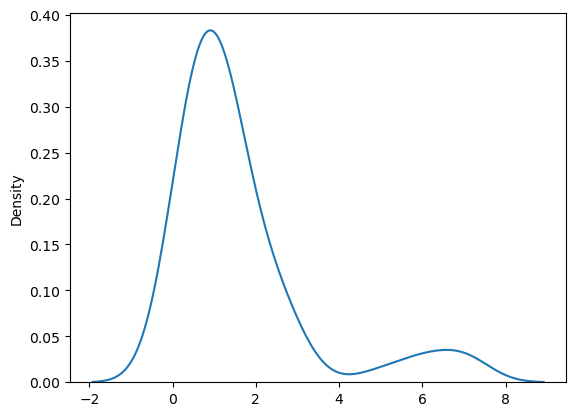

In [717]:
teams1 = teams[teams['matchesplayedhs'] >= 6]
winlossratio = pd.concat([teams1['win-losshs'],teams1['win-lossnhs']])
sns.kdeplot(winlossratio)

In [719]:
teams1[(teams1['win-losshs']>=4)|(teams1['win-lossnhs']>=4)]
#we saw two peaks in our kde, which implies different categories inside data, most of the matches had average win-loss ratio of
# 1 but few matches had a higher win-loss ratio leading to second peak in the graph, and if we analyse the matches where win-loss
# is greater than 4, we can see that it is mostly observed in homestate performance of teams.

,season,team,homestate,matchesplayedhs,matcheswonhs,matchesplayednhs,matcheswonnhs,win-losshs,win-lossnhs
1,2008,Kings XI Punjab,Chandigarh,7,6,7,4,6.00,1.33
5,2008,Rajasthan Royals,Jaipur,7,7,7,4,inf,1.33
116,2010,Mumbai Indians,Mumbai,8,7,6,3,7.00,1.00
175,2011,Chennai Super Kings,Chennai,7,7,7,2,inf,0.40
182,2011,Royal Challengers Bangalore,Bangalore,6,5,7,4,5.00,1.33
249,2012,Kolkata Knight Riders,Kolkata,7,3,8,7,0.75,7.00
250,2012,Mumbai Indians,Mumbai,8,3,8,7,0.60,7.00
323,2013,Royal Challengers Bangalore,Bangalore,8,7,8,2,7.00,0.33
324,2013,Sunrisers Hyderabad,Hyderabad,8,7,8,3,7.00,0.60
329,2013,Rajasthan Royals,Jaipur,8,8,8,2,inf,0.33


In [720]:
def is_playoff(row):
    filterdf = playoffteams[(playoffteams['season']==row['season']) & (playoffteams['team']==row['team'])]
    if len(filterdf) == 1:
        return "yes"
    else:
        return "no"


teams['is_qualified'] = teams.apply(is_playoff,axis = 1)

C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_14264\4058288287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams['is_qualified'] = teams.apply(is_playoff,axis = 1)


In [721]:
teams.loc[teams['win-losshs'].isin([np.inf]),'win-losshs'] = 10
#replaced all inf with 10 for visualization purpose

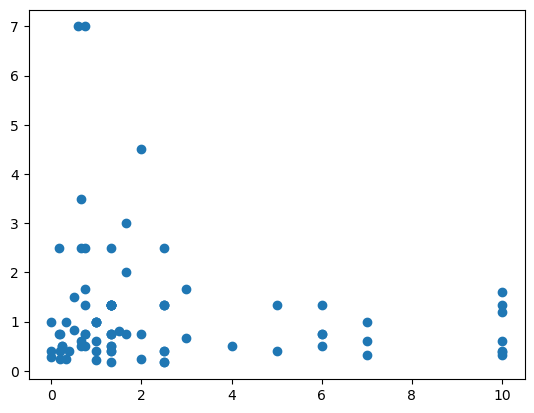

In [722]:
dummy = teams[(~teams['season'].isin([2009,2020])) & ~(teams['win-losshs'].isna())]
plt.scatter(dummy['win-losshs'],dummy['win-lossnhs'])
plt.show()

win-losshsmean:3.7257142857142855,win-lossnhsmean:0.7727272727272727
win-losshsmedian:1.33,win-lossnhsmedian:0.75
seasons qualified for playoffs:[2008 2013 2015 2018]


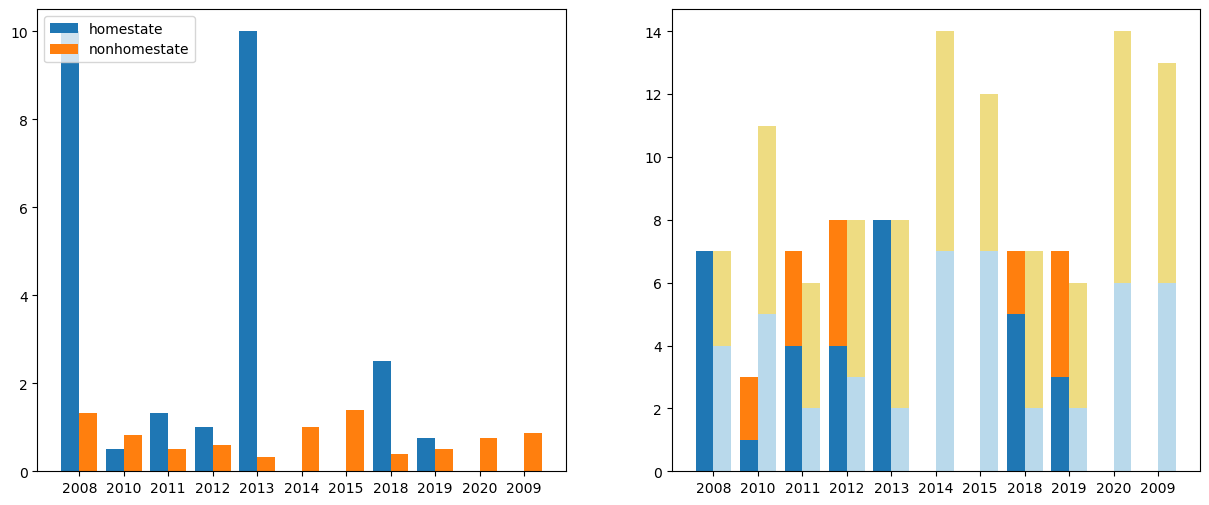

In [723]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,6))
dumm = teams[teams['team']=='Rajasthan Royals']
season = dumm['season']
xaxis = np.arange(len(season))
print(f"win-losshsmean:{dumm['win-losshs'].mean()},win-lossnhsmean:{dumm['win-lossnhs'].mean()}")
print(f"win-losshsmedian:{dumm['win-losshs'].median()},win-lossnhsmedian:{dumm['win-lossnhs'].median()}")
print(f"seasons qualified for playoffs:{dumm[dumm['is_qualified']=='yes']['season'].values}")
ax1.bar(xaxis - 0.2,dumm['win-losshs'],width = 0.4,label = 'homestate')
ax1.bar(xaxis + 0.2,dumm['win-lossnhs'],width = 0.4,label = 'nonhomestate')
ax1.set_xticks(xaxis,season)
ax2.bar(xaxis-0.2,dumm['matcheswonhs'],width=0.4)
ax2.bar(xaxis-0.2,dumm['matchesplayedhs']-dumm['matcheswonhs'],bottom = dumm['matcheswonhs'],width = 0.4)
ax2.bar(xaxis+0.2,dumm['matcheswonnhs'],width=0.4,color = '#B9D9EB')
ax2.bar(xaxis+0.2,dumm['matchesplayednhs']-dumm['matcheswonnhs'],bottom = dumm['matcheswonnhs'],width=0.4,color='#eedc82')
ax2.set_xticks(xaxis,season)
ax1.legend()
plt.show()

In [ ]:
#SRH - has homestate advantage as it always performed better in homestate than non-homestate. In 2014,2015, matches played
       in homestate is low compared to non-homestate which might be the reason behind it not qualifying for playoffs.

#RR - has homstate advantage as it performed well in homestate than non-homestate.
#DC - it has performed well in non-homestate than homestate.

#CSK - has homestate advantage as it performed well in homestate than non-homestate but also a strong team.


In [724]:
df['result'].value_counts(normalize = True)

result
wickets    0.535714
runs       0.448276
tie        0.016010
Name: proportion, dtype: float64

<Axes: xlabel='result_margin', ylabel='Count'>

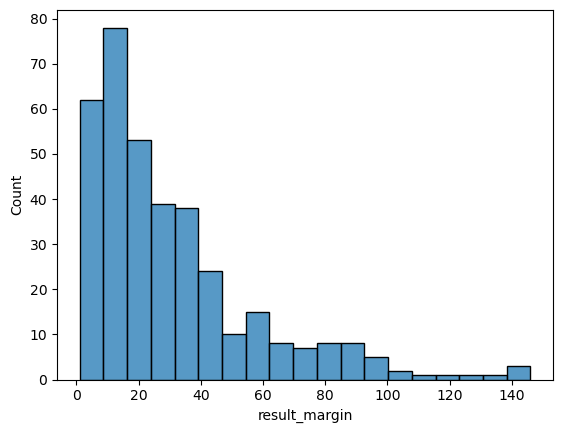

In [725]:
sns.histplot(df.loc[df['result']=='runs','result_margin'])

In [566]:
df.loc[df['result']=='runs','result_margin'].median()

22.0

In [567]:
df[df['result']=='runs'].groupby(['winner'])['result_margin'].max()

winner
Chennai Super Kings             97
Deccan Chargers                 82
Delhi Capitals                  97
Gujarat Lions                    1
Kings XI Punjab                111
Kochi Tuskers Kerala            17
Kolkata Knight Riders          140
Mumbai Indians                 146
Pune Warriors                   38
Rajasthan Royals               105
Rising Pune Supergiant          61
Royal Challengers Bangalore    144
Sunrisers Hyderabad            118
Name: result_margin, dtype: int32

In [574]:
df[(df['result']=='runs')&(df['result_margin']>=60)].groupby(['winner'])['id'].count()

winner
Chennai Super Kings            11
Deccan Chargers                 1
Delhi Capitals                  2
Kings XI Punjab                 5
Kolkata Knight Riders           4
Mumbai Indians                  8
Rajasthan Royals                5
Rising Pune Supergiant          1
Royal Challengers Bangalore     8
Sunrisers Hyderabad             4
Name: id, dtype: int64

<Axes: xlabel='result_margin', ylabel='Density'>

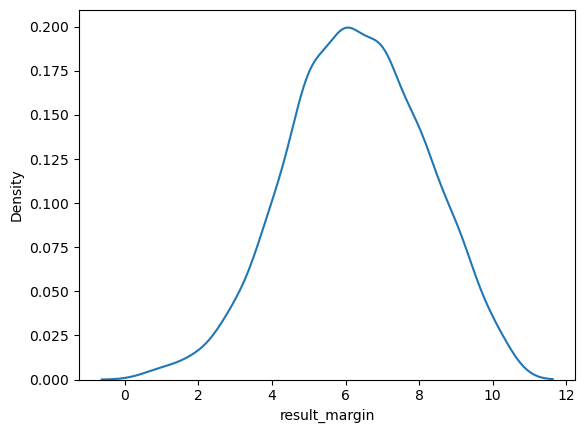

In [571]:
sns.kdeplot(df.loc[df['result'] == 'wickets','result_margin'])

In [569]:
df.groupby(['winner','result'])['id'].count()

winner                       result 
Chennai Super Kings          runs       53
                             wickets    53
Deccan Chargers              runs       18
                             wickets    11
Delhi Capitals               runs       34
                             tie         2
                             wickets    50
Gujarat Lions                runs        1
                             wickets    12
Kings XI Punjab              runs       40
                             tie         3
                             wickets    45
Kochi Tuskers Kerala         runs        2
                             wickets     4
Kolkata Knight Riders        runs       41
                             tie         1
                             wickets    57
Mumbai Indians               runs       62
                             tie         2
                             wickets    56
Pune Warriors                runs        6
                             wickets     6
Rajasthan Royals 

In [726]:
playoffteams.to_excel(r"C:\Users\dheeraja vani\OneDrive\Desktop\Data analyst\Python\IPL Data set\IPLplayoffteams.xlsx")

In [727]:
teams.to_excel(r"C:\Users\dheeraja vani\OneDrive\Desktop\Data analyst\Python\IPL Data set\homestateanalysis.xlsx")

In [728]:
teamtossanalysis.to_excel(r"C:\Users\dheeraja vani\OneDrive\Desktop\Data analyst\Python\IPL Data set\tossanalysis.xlsx")

In [729]:
matcheswondf.to_excel(r"C:\Users\dheeraja vani\OneDrive\Desktop\Data analyst\Python\IPL Data set\matcheswonexplyoff.xlsx")

In [730]:
topfour.to_excel(r"C:\Users\dheeraja vani\OneDrive\Desktop\Data analyst\Python\IPL Data set\playoffposition.xlsx")

In [735]:
df.to_excel(r"C:\Users\dheeraja vani\OneDrive\Desktop\Data analyst\Python\IPL Data set\IPLteamsclean.xlsx")

In [318]:
df['matcheswon'] = df.groupby(['winner'])['id'].transform('count')

In [319]:
df[~df['season'].isin([2016,2017])].groupby(['team1'])['id'].count() 

team1
Chennai Super Kings            94
Deccan Chargers                39
Delhi Capitals                 87
Kings XI Punjab                78
Kochi Tuskers Kerala            7
Kolkata Knight Riders          81
Mumbai Indians                 80
Pune Warriors                  23
Rajasthan Royals               70
Royal Challengers Bangalore    91
Sunrisers Hyderabad            43
Name: id, dtype: int64

In [320]:
df[~df['season'].isin([2016,2017])].groupby(['team2'])['id'].count()

team2
Chennai Super Kings            84
Deccan Chargers                36
Delhi Capitals                 77
Kings XI Punjab                84
Kochi Tuskers Kerala            7
Kolkata Knight Riders          80
Mumbai Indians                 92
Pune Warriors                  22
Rajasthan Royals               89
Royal Challengers Bangalore    72
Sunrisers Hyderabad            50
Name: id, dtype: int64

In [321]:
df[~df['season'].isin([2016,2017])].groupby(['winner'])['id'].count()

winner
Chennai Super Kings            106
Deccan Chargers                 29
Delhi Capitals                  73
Kings XI Punjab                 77
Kochi Tuskers Kerala             6
Kolkata Knight Riders           82
Mumbai Indians                 101
Pune Warriors                   12
Rajasthan Royals                81
Royal Challengers Bangalore     79
Sunrisers Hyderabad             47
Name: id, dtype: int64

In [322]:
matchesplayeddict = (df.groupby(['team1'])['id'].count() + df.groupby(['team2'])['id'].count()).to_dict()

In [323]:
df['matchesplayed'] = df['winner'].map(matchesplayeddict)

In [324]:
df['matchesplayed'].isna().sum()

0

In [325]:
df['winpercent'] = ((df['matcheswon'])*100/df['matchesplayed']).round(2)

In [ ]:
#Below dataframe TPS tells overall team performance across all seasons

In [326]:
TPS = df[['winner','winpercent']].drop_duplicates().sort_values('winpercent',ascending = False).reset_index(drop = True)

<Axes: xlabel='winner'>

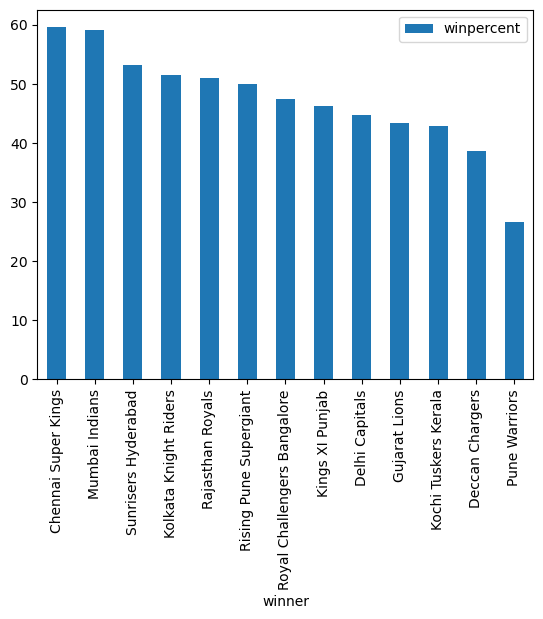

In [327]:
TPS.set_index('winner').plot(kind= 'bar')

In [ ]:
#from above graph, we can say CSK outperformed MI though absent in 2016,2017 seasons.

In [328]:
df['matcheswonseason'] = df.groupby(['winner','season'])['id'].transform('count')

In [329]:
seasonwisematches = (pd.concat([df.groupby(['season','team1'])['id'].count(),
            df.groupby(['season','team2'])['id'].count()],axis = 0)).reset_index()

In [330]:
seasonwisematches = (seasonwisematches.groupby(seasonwisematches['season'].astype('str')+
                                               seasonwisematches['level_1'])['id'].sum().to_dict())

In [331]:
df['matplayseason'] = (df['season'].astype('str') + df['winner']).map(seasonwisematches)

In [332]:
df['win%season'] = ((df['matcheswonseason']*100)/df['matplayseason']).round(2)

In [333]:
PBS = df.pivot_table(index = 'winner',
               columns = 'season',
               values = 'win%season',
               aggfunc = 'min').reset_index()

In [ ]:
#above pivot_table shows the performance by season of all teams

In [334]:
df.loc[df['date'].isin(df.groupby(['season'])['date'].max().values)][['season','winner']].reset_index(drop=True)

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [335]:
PBS.loc[PBS['winner'].isin(['Chennai Super Kings','Mumbai Indians'])]

season,winner,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Chennai Super Kings,56.25,57.14,56.25,68.75,55.56,66.67,62.50,58.82,NaN,NaN,68.75,58.82,42.86
7,Mumbai Indians,50.00,38.46,68.75,62.50,58.82,68.42,46.67,62.50,50.0,70.59,42.86,68.75,68.75


In [60]:
#From above, we can say that MI & CSK are strong teams in IPL
# MI performance is very low in 2009 compared to all seasons.

In [336]:
PBS.loc[PBS['winner'].isin(['Deccan Chargers','Kochi Tuskers Kerala'])]

season,winner,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Deccan Chargers,14.29,56.25,50.0,42.86,26.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kochi Tuskers Kerala,NaN,NaN,NaN,42.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
PBS

season,winner,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Chennai Super Kings,56.25,57.14,56.25,68.75,55.56,66.67,62.50,58.82,NaN,NaN,68.75,58.82,42.86
1,Deccan Chargers,14.29,56.25,50.00,42.86,26.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Delhi Capitals,50.00,66.67,50.00,30.77,61.11,18.75,14.29,38.46,50.00,42.86,35.71,62.50,52.94
3,Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.25,28.57,NaN,NaN,NaN
4,Kings XI Punjab,66.67,50.00,28.57,50.00,50.00,50.00,70.59,21.43,28.57,50.00,42.86,42.86,42.86
5,Kochi Tuskers Kerala,NaN,NaN,NaN,42.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kolkata Knight Riders,46.15,23.08,50.00,53.33,70.59,37.50,68.75,53.85,53.33,56.25,56.25,42.86,50.00
7,Mumbai Indians,50.00,38.46,68.75,62.50,58.82,68.42,46.67,62.50,50.00,70.59,42.86,68.75,68.75
8,Pune Warriors,NaN,NaN,NaN,30.77,25.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Rajasthan Royals,81.25,46.15,42.86,46.15,43.75,61.11,50.00,53.85,NaN,NaN,46.67,38.46,42.86


In [338]:
teams = pd.concat([df[['season','team1']].drop_duplicates().rename(columns = {'team1':'team'}),
           df[['season','team2']].drop_duplicates().rename(columns = {'team2':'team'})],axis=0).drop_duplicates()

In [339]:
homestatedict = {'Royal Challengers Bangalore':'Bangalore','Kings XI Punjab':'Chandigarh',
                 'Mumbai Indians':'Mumbai','Kolkata Knight Riders':'Kolkata','Rajasthan Royals':'Jaipur',
                 'Deccan Chargers':'Hyderabad','Chennai Super Kings':'Chennai','Kochi Tuskers Kerala':'Kochi',
                 'Sunrisers Hyderabad':'Hyderabad','Delhi Capitals':'Delhi','Gujarat Lions':'Rajkot',
                 'Rising Pune Supergiant':'Pune'}

In [340]:
teams['homestate'] = teams['team'].map(homestatedict)

In [ ]:
#we can drop "Pune Warriors" from teams dataframe as its peformance was quite low in all the 3 years it played. Also we can drop
#2020,2009 as matches were held out of India

In [341]:
teams.dropna(subset = ['homestate'],inplace = True)

In [ ]:
#Now, we can separate playoffs from remanining matches for a better statistic

In [342]:
playoffs = df.sort_values(['date'],ascending = [False]).groupby(['season']).head(4)

In [ ]:
#In 2008,2009 we have only 3 playoffs. So we need to remove the extra match included from above

In [343]:
playoffs= (playoffs[~playoffs['date'].isin(playoffs[playoffs['season'].isin([2008,2009])].groupby(['season'])['date'].min())]
           .reset_index(drop=True))

In [344]:
remmatches = df[~df['date'].isin(playoffs['date'])].reset_index(drop = True)

In [345]:
remmatches[(remmatches['season']==2008)&(remmatches['city']=='Hyderabad')]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,method(D/L),umpire1,umpire2,season,matcheswon,matchesplayed,winpercent,matcheswonseason,matplayseason,win%season
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Capitals,Deccan Chargers,bat,...,0,IL Howell,AM Saheba,2008,86,192,44.79,7,14,50.00
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,...,0,Asad Rauf,MR Benson,2008,81,159,50.94,13,16,81.25
17,335999,Hyderabad,2008-05-01,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,...,0,BR Doctrove,RB Tiffin,2008,88,190,46.32,10,15,66.67
20,336002,Hyderabad,2008-05-25,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,...,0,Asad Rauf,RE Koertzen,2008,91,192,47.40,4,14,28.57
32,336014,Hyderabad,2008-05-11,SC Ganguly,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders,bat,...,0,IL Howell,AM Saheba,2008,99,192,51.56,6,13,46.15
42,336024,Hyderabad,2008-05-18,DJ Bravo,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Mumbai Indians,Deccan Chargers,field,...,0,BR Doctrove,DJ Harper,2008,120,203,59.11,7,14,50.00
54,336037,Hyderabad,2008-05-27,SK Raina,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Chennai Super Kings,Deccan Chargers,bat,...,0,BG Jerling,AM Saheba,2008,106,178,59.55,9,16,56.25


In [346]:
teams

,season,team,homestate
0,2008,Royal Challengers Bangalore,Bangalore
1,2008,Kings XI Punjab,Chandigarh
2,2008,Delhi Capitals,Delhi
3,2008,Mumbai Indians,Mumbai
4,2008,Kolkata Knight Riders,Kolkata
...,...,...,...
762,2020,Kings XI Punjab,Chandigarh
763,2020,Royal Challengers Bangalore,Bangalore
771,2020,Sunrisers Hyderabad,Hyderabad
773,2020,Chennai Super Kings,Chennai


In [347]:
teams1 = teams.copy()

In [348]:
teams1

,season,team,homestate
0,2008,Royal Challengers Bangalore,Bangalore
1,2008,Kings XI Punjab,Chandigarh
2,2008,Delhi Capitals,Delhi
3,2008,Mumbai Indians,Mumbai
4,2008,Kolkata Knight Riders,Kolkata
...,...,...,...
762,2020,Kings XI Punjab,Chandigarh
763,2020,Royal Challengers Bangalore,Bangalore
771,2020,Sunrisers Hyderabad,Hyderabad
773,2020,Chennai Super Kings,Chennai


In [351]:
def matchesplayed(row):
    i = (len(remmatches[(remmatches['winner']==row['team'])
                         & (remmatches['season']==row['season'])]))
    return i



teams1['matcheswon'] = teams1.apply(matchesplayed,axis=1)

In [352]:
def matchesplayed(row):
    i = (len(remmatches[((remmatches['team1']==row['team'])|(remmatches['team2']==row['team']))
                         & (remmatches['season']==row['season'])]))
    return i



teams1['matchesplayed'] = teams1.apply(matchesplayed,axis=1)

In [350]:
def matchesplayed(row):
    i = (len(remmatches[((remmatches['team1']==row['team'])|(remmatches['team2']==row['team']))
                         & ((remmatches['season']==row['season'])&(remmatches['city']==row['homestate']))]))
    return i



teams1['matchesplayedhs'] = teams1.apply(matchesplayed,axis=1)

In [349]:
def matchesplayed(row):
    i = (len(remmatches[(remmatches['winner']==row['team'])
                         & (remmatches['season']==row['season'])&(remmatches['city']==row['homestate'])]))
    return i



teams1['matcheswonhs'] = teams1.apply(matchesplayed,axis=1)

In [353]:
teams1[teams1['season']==2012]

,season,team,homestate,matcheswonhs,matchesplayedhs,matcheswon,matchesplayed
248,2012,Chennai Super Kings,Chennai,5,8,8,15
249,2012,Kolkata Knight Riders,Kolkata,3,7,10,15
250,2012,Mumbai Indians,Mumbai,3,8,10,16
251,2012,Rajasthan Royals,Jaipur,4,8,7,16
252,2012,Royal Challengers Bangalore,Bangalore,3,7,8,15
253,2012,Deccan Chargers,Hyderabad,2,4,4,15
258,2012,Delhi Capitals,Delhi,5,8,11,16
261,2012,Kings XI Punjab,Chandigarh,2,6,8,16


In [354]:
teams1['matcheswonhs'] = teams1['matcheswonhs'].astype('int32')

In [355]:
teams1['matcheswonnhs'] = (np.where(teams1['matcheswonhs'].isna(),teams1['matcheswon'],
                                    teams1['matcheswon']-teams1['matcheswonhs']))
teams1['matchesplayednhs'] = (np.where(teams1['matchesplayedhs'].isna(),teams1['matchesplayed'],
                                       teams1['matchesplayed']-teams1['matchesplayedhs']))

In [356]:
teams1[teams1['team']=='Deccan Chargers']

,season,team,homestate,matcheswonhs,matchesplayedhs,matcheswon,matchesplayed,matcheswonnhs,matchesplayednhs
6,2008,Deccan Chargers,Hyderabad,0,7,2,14,2,7
61,2009,Deccan Chargers,Hyderabad,0,0,7,14,7,14
115,2010,Deccan Chargers,Hyderabad,0,0,8,14,8,14
176,2011,Deccan Chargers,Hyderabad,1,7,6,14,5,7
253,2012,Deccan Chargers,Hyderabad,2,4,4,15,2,11


In [ ]:
#In 2019, Rajasthan Royals and RCB have one match less in the above teams1 dataframe because this match is a part of initial
#rows we dropped as they have winner as NA()

In [ ]:
#In 2018, CSK played only one match in home city Chennai due to cauvery conflict. Other 6 matches are held in pune as
#substitution for CSK.

#KXIP played other 4 matches in Indore due to some renovation of chandigarh airport.

In [ ]:
#In 2017, one mactch between SRH & RCB was abandonded due to rain.
#KXIP played 3 matches in Indore.
#Gujarat Lions played 2 matches in Kanpur.

In [ ]:
#In 2016,Gujarat Lions played 2 matches in Kanpur.
#MI played 3 matches in Visakhapatnam due to drought in Maharashtra
#Delhi daredevils also played 2 matches in visakhapatnam.

In [ ]:
#In 2015, Rajasthan Royals did not play any match in Jaipur, instead Ahmedabad & Mumbai (Brabourne std) hosted its matches
#KXIP played 3 matchs in Pune.
#SRH played 3 matches in visakhapatnam.

In [ ]:
#In 2013,DD played two matches in Raipur.
#KKR played 2 matches in Ranchi.

In [357]:
(remmatches[(remmatches['season']==2008)&((remmatches['team1']=='Chennai Super Kings')
            |(remmatches['team2']=='Chennai Super Kings')) &(remmatches['city']=='Chennai')])

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,method(D/L),umpire1,umpire2,season,matcheswon,matchesplayed,winpercent,matcheswonseason,matplayseason,win%season
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,...,0,DJ Harper,GA Pratapkumar,2008,106,178,59.55,9,16,56.25
11,335993,Chennai,2008-04-26,JDP Oram,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,bat,...,0,BF Bowden,AV Jayaprakash,2008,106,178,59.55,9,16,56.25
19,336001,Chennai,2008-05-02,V Sehwag,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,...,0,BF Bowden,K Hariharan,2008,86,192,44.79,7,14,50.00
25,336007,Chennai,2008-05-06,AC Gilchrist,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,...,0,MR Benson,RB Tiffin,2008,29,75,38.67,2,14,14.29
31,336013,Chennai,2008-05-10,L Balaji,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,...,0,AV Jayaprakash,BG Jerling,2008,106,178,59.55,9,16,56.25
47,336029,Chennai,2008-05-21,A Kumble,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,...,0,DJ Harper,I Shivram,2008,91,192,47.40,4,14,28.57
50,336033,Chennai,2008-05-24,JA Morkel,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,bat,...,0,DJ Harper,SL Shastri,2008,81,159,50.94,13,16,81.25


In [358]:
teams2 = teams1[(teams1['matchesplayedhs']>=5)& ~(teams1['season'].isin([2009,2020]))]

In [359]:
p1 = teams2['matcheswonhs'].sum()/teams2['matchesplayedhs'].sum()
p2 = teams2['matcheswonnhs'].sum()/teams2['matchesplayednhs'].sum()
n1 = teams2['matchesplayedhs'].sum()
n2 = teams2['matchesplayednhs'].sum()
#check if it follows normal distribution
p1*n1,(1-p1)*n1,p2*n2,(1-p2)*n2
#setting up null and alternative hypothesis
# H0: p1-p2 = 0
# H1: p1-p2!= 0
#finding pooled proportion
p0=((teams2['matcheswonhs'].sum()+teams2['matcheswonnhs'].sum())/
    (teams2['matchesplayedhs'].sum()+teams2['matchesplayednhs'].sum()))
std = sqrt(((p0*(1-p0))/n1) + ((p0*(1-p0))/n2))
pointestimate = p1-p2
z = (pointestimate - 0)/std
print(z)
area = stats.norm.cdf(z)
print(1-area)
print((1-area)*2)

4.045102191009288
2.6150152618531486e-05
5.230030523706297e-05


In [360]:
p1,p2

(0.5773195876288659, 0.4506517690875233)

In [361]:
teams2.groupby(['team'])['season'].unique()

team
Chennai Super Kings                                    [2008, 2010, 2011, 2012, 2013, 2015, 2019]
Deccan Chargers                                                                      [2008, 2011]
Delhi Capitals                 [2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Gujarat Lions                                                                        [2016, 2017]
Kings XI Punjab                                              [2008, 2010, 2012, 2013, 2016, 2019]
Kochi Tuskers Kerala                                                                       [2011]
Kolkata Knight Riders                [2008, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019]
Mumbai Indians                       [2008, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019]
Rajasthan Royals                                             [2008, 2011, 2012, 2013, 2018, 2019]
Rising Pune Supergiant                                                                     [2017]
Royal Challenge

In [362]:
teams2['win-losshs'] = (teams2['matcheswonhs']/(teams2['matchesplayedhs'] - teams2['matcheswonhs'])).round(2)
teams2['win-lossnhs'] = (teams2['matcheswonnhs']/(teams2['matchesplayednhs'] - teams2['matcheswonnhs'])).round(2)


C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_12764\3291810788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams2['win-losshs'] = (teams2['matcheswonhs']/(teams2['matchesplayedhs'] - teams2['matcheswonhs'])).round(2)
C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_12764\3291810788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams2['win-lossnhs'] = (teams2['matcheswonnhs']/(teams2['matchesplayednhs'] - teams2['matcheswonnhs'])).round(2)


In [363]:
winloss = np.append(teams2[~teams2['win-losshs'].isin([np.inf])]['win-losshs'].values,teams2['win-lossnhs'].values)

<Axes: ylabel='Density'>

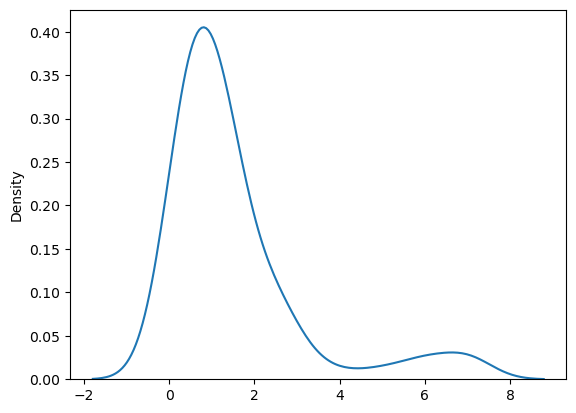

In [364]:
sns.kdeplot(winloss)

In [365]:
teams2[(teams2['win-losshs']>=4)|(teams2['win-lossnhs']>=4)]

,season,team,homestate,matcheswonhs,matchesplayedhs,matcheswon,matchesplayed,matcheswonnhs,matchesplayednhs,win-losshs,win-lossnhs
1,2008,Kings XI Punjab,Chandigarh,6,7,10,14,4,7,6.00,1.33
5,2008,Rajasthan Royals,Jaipur,7,7,11,14,4,7,inf,1.33
116,2010,Mumbai Indians,Mumbai,7,8,10,14,3,6,7.00,1.00
175,2011,Chennai Super Kings,Chennai,7,7,9,14,2,7,inf,0.40
182,2011,Royal Challengers Bangalore,Bangalore,5,6,9,13,4,7,5.00,1.33
249,2012,Kolkata Knight Riders,Kolkata,3,7,10,15,7,8,0.75,7.00
250,2012,Mumbai Indians,Mumbai,3,8,10,16,7,8,0.60,7.00
323,2013,Royal Challengers Bangalore,Bangalore,7,8,9,16,2,8,7.00,0.33
324,2013,Sunrisers Hyderabad,Hyderabad,7,8,10,16,3,8,7.00,0.60
329,2013,Rajasthan Royals,Jaipur,8,8,10,16,2,8,inf,0.33


In [ ]:
# From above, we can say that teams had their highest win-loss ratio in home states mostly but that doesnt certainly imply
homestate advantage.

In [ ]:
#summary - info about the playoff teams of each season.

In [366]:
summary = (pd.concat([playoffs[['season','team1']].drop_duplicates().rename(columns = {'team1':'team'})
            ,playoffs[['season','team2']].drop_duplicates().rename(columns = {'team2':'team'})],axis=0)
             .drop_duplicates().sort_values(['season'],ascending = [True])).reset_index(drop = True)

summary = pd.merge(summary,teams1,on = ['season','team'],how = 'inner')

In [ ]:
#Lets deep dive into homestate bias for each team.

In [369]:
teams2[teams2['team']=='Delhi Capitals']

,season,team,homestate,matcheswonhs,matchesplayedhs,matcheswon,matchesplayed,matcheswonnhs,matchesplayednhs,win-losshs,win-lossnhs
2,2008,Delhi Capitals,Delhi,4,6,7,13,3,7,2.00,0.75
123,2010,Delhi Capitals,Delhi,3,7,7,14,4,7,0.75,1.33
178,2011,Delhi Capitals,Delhi,1,6,4,13,3,7,0.20,0.75
258,2012,Delhi Capitals,Delhi,5,8,11,16,6,8,1.67,3.00
325,2013,Delhi Capitals,Delhi,1,6,3,16,2,10,0.20,0.25
399,2014,Delhi Capitals,Delhi,0,5,2,14,2,9,0.00,0.29
463,2015,Delhi Capitals,Delhi,2,5,5,13,3,8,0.67,0.60
523,2016,Delhi Capitals,Delhi,3,5,7,14,4,9,1.50,0.80
591,2017,Delhi Capitals,Delhi,4,7,6,14,2,7,1.33,0.40
657,2018,Delhi Capitals,Delhi,4,7,5,14,1,7,1.33,0.17


In [370]:
winlosshs = teams2[teams2['team']=='Delhi Capitals']['win-losshs'].reset_index(drop = True)
winlossnhs = teams2[teams2['team']=='Delhi Capitals']['win-lossnhs'].reset_index(drop = True)

winlosshs>winlossnhs

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10    False
dtype: bool

In [371]:
summary[summary['team']=='Delhi Capitals']

,season,team,homestate,matcheswonhs,matchesplayedhs,matcheswon,matchesplayed,matcheswonnhs,matchesplayednhs
3,2008,Delhi Capitals,Delhi,4,6,7,13,3,7
5,2009,Delhi Capitals,Delhi,0,0,10,14,10,14
17,2012,Delhi Capitals,Delhi,5,8,11,16,6,8
46,2019,Delhi Capitals,Delhi,4,7,9,14,5,7
51,2020,Delhi Capitals,Delhi,0,0,8,14,8,14


In [94]:
summary.groupby(['season'])['matcheswon'].min()

season
2008     7
2009     7
2010     7
2011     8
2012     8
2013    10
2014     7
2015     7
2016     8
2017     8
2018     7
2019     6
2020     7
Name: matcheswon, dtype: int64

In [95]:
teams1[teams1['team']=='Kolkata Knight Riders']

,season,team,homestate,matcheswonhs,matchesplayedhs,matcheswon,matchesplayed,matcheswonnhs,matchesplayednhs
4,2008,Kolkata Knight Riders,Kolkata,4,7,6,13,2,6
66,2009,Kolkata Knight Riders,Kolkata,0,0,3,13,3,13
118,2010,Kolkata Knight Riders,Kolkata,5,7,7,14,2,7
180,2011,Kolkata Knight Riders,Kolkata,4,7,8,14,4,7
249,2012,Kolkata Knight Riders,Kolkata,3,7,10,15,7,8
322,2013,Kolkata Knight Riders,Kolkata,4,6,6,16,2,10
403,2014,Kolkata Knight Riders,Kolkata,3,3,9,14,6,11
458,2015,Kolkata Knight Riders,Kolkata,5,6,7,13,2,7
518,2016,Kolkata Knight Riders,Kolkata,4,7,8,14,4,7
587,2017,Kolkata Knight Riders,Kolkata,4,7,8,14,4,7


In [96]:
(remmatches.loc[(remmatches['season'].isin([2008]))& ((remmatches['team1']=='Deccan Chargers')
                | (remmatches['team2']=='Deccan Chargers')),
                ['season','city','team1','team2','winner']])

,season,city,team1,team2,winner
4,2008,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders
6,2008,Hyderabad,Deccan Chargers,Delhi Daredevils,Delhi Daredevils
8,2008,Hyderabad,Deccan Chargers,Rajasthan Royals,Rajasthan Royals
12,2008,Mumbai,Mumbai Indians,Deccan Chargers,Deccan Chargers
17,2008,Hyderabad,Deccan Chargers,Kings XI Punjab,Kings XI Punjab
20,2008,Hyderabad,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore
25,2008,Chennai,Chennai Super Kings,Deccan Chargers,Deccan Chargers
29,2008,Jaipur,Rajasthan Royals,Deccan Chargers,Rajasthan Royals
32,2008,Hyderabad,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders
38,2008,Delhi,Delhi Daredevils,Deccan Chargers,Delhi Daredevils


In [97]:
(remmatches.loc[(remmatches['season'].isin([2018]))& ((remmatches['team1']=='Chennai Super Kings')
                | (remmatches['team2']=='Chennai Super Kings')) & (remmatches['winner']=='Chennai Super Kings'),
                ['season','city','team1','team2','winner']])

,season,city,team1,team2,winner
595,2018,Mumbai,Mumbai Indians,Chennai Super Kings,Chennai Super Kings
599,2018,Chennai,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings
611,2018,Pune,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings
614,2018,Hyderabad,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings
618,2018,Bangalore,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings
624,2018,Pune,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings
629,2018,Pune,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings
640,2018,Pune,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings
650,2018,Pune,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings


In [466]:
#CSK has no particular homestate advantage though it has more win-loss ratio in home state compared to non home state.
This is because, in 2009,2014,2018 - Though no matches are played in homestate i.e,Chennai, it is able to maintain
good performance. Also in 2018, Pune was selected as alternative homestate for CSK and it won 5 out of 7 matches there. So 
we can say pune is favourable venue for CSK.

In [ ]:
#DC has no specific homestate advantage.It started performing better in homestate from 2016 only but in all the playoffs,
it got qualified, DC played better in non homestate.

In [ ]:
#KXIP has no advantage of homestate, as it differed in each season.

In [ ]:
#Though KKR performed really well in homestate in few season, it failed to have high run rate. In all the seasons where
KKR is qualified to playoffs,it performed equally well or better than homestate in nonhomestate matches.

In [ ]:
#MI is not consistent in its homestate and nonhomestate performance. Mostly, performance is close in both categories
2012 -- performed best in non homestate
2013 -- performed best in homestate

In [ ]:
#RR performed better in homestate than nonhomestate. RR has homestate advantage. In 3 out of 4 qualified playoffs,RR performed
better in homestate than nonhomestate.

In [ ]:
#RCB performed equally well in homestate and nonhomestate. But RCB had best win-loss ratio in homestate.
2013 -- performed best in homestate

In [ ]:
#SRH performed better in homestate than nonhomestate, In 2015, it onlyplayed 4 matches in homestate which might be one of the
reasons for it not qualifying for playoffs.

In [ ]:
# Overall, we can conclude that SRH and RR are the teams that had homestate advantage
And, teams had their highest wins in homestate than nonhomestate.

In [176]:
teams2[teams2['season']==2010]

,season,team,homestate,matcheswonhs,matchesplayedhs,matcheswon,matchesplayed,matcheswonnhs,matchesplayednhs,win-losshs,win-lossnhs
116,2010,Mumbai Indians,Mumbai,7,8,10,14,3,6,7.00,1.00
117,2010,Kings XI Punjab,Chandigarh,1,5,4,14,3,9,0.25,0.50
118,2010,Kolkata Knight Riders,Kolkata,5,7,7,14,2,7,2.50,0.40
119,2010,Chennai Super Kings,Chennai,4,7,7,14,3,7,1.33,0.75
121,2010,Royal Challengers Bangalore,Bangalore,4,7,7,14,3,7,1.33,0.75
123,2010,Delhi Daredevils,Delhi,3,7,7,14,4,7,0.75,1.33


In [ ]:
#we need to find if tossdecision is anyway related to matchoutput.Let us perform chi-square test

In [98]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,method(D/L),umpire1,umpire2,season,matcheswon,matchesplayed,winpercent,matcheswonseason,matplayseason,win%season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,Asad Rauf,RE Koertzen,2008,99,192,51.56,6,13,46.15
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,0,MR Benson,SL Shastri,2008,106,178,59.55,9,16,56.25
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,0,Aleem Dar,GA Pratapkumar,2008,67,159,42.14,7,14,50.00
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,0,SJ Davis,DJ Harper,2008,91,192,47.40,4,14,28.57
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,0,BF Bowden,K Hariharan,2008,99,192,51.56,6,13,46.15


In [372]:
outofindia = df[df['neutral_venue']==1]['city'].unique()

In [373]:
dfinindia = df.loc[~df['city'].isin(outofindia)]

In [374]:
dfinindia['season'].unique()

array([2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [375]:
dfinindia['matwinstatus'] = np.where(dfinindia['toss_winner']==dfinindia['winner'],1,0)

C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_12764\2746918496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfinindia['matwinstatus'] = np.where(dfinindia['toss_winner']==dfinindia['winner'],1,0)


In [376]:
tossvsoutput = pd.crosstab(dfinindia['matwinstatus'],dfinindia['toss_decision'],margins = True)

In [ ]:
#H0 - tossdecision and match output are independent of each other
#H1 - tossdecision and match output are dependent on each other

In [377]:
losspercent = (tossvsoutput.iloc[0,2]/tossvsoutput.iloc[-1,-1]).round(4)*100
explosscntbat = ((losspercent*tossvsoutput.iloc[-1,-3])/100).round(2)
explosscntfield = ((losspercent*tossvsoutput.iloc[-1,-2])/100).round(2)
expwincntbat = tossvsoutput.iloc[-1,-3] - explosscntbat
expwincntfield = tossvsoutput.iloc[-1,-2] - explosscntfield

actlosscntbat = tossvsoutput.iloc[0,0]
actlosscntfield = tossvsoutput.iloc[0,1]
actwincntbat = tossvsoutput.iloc[1,0]
actwincntfield = tossvsoutput.iloc[1,1]

actuals = [actlosscntbat,actlosscntfield,actwincntbat,actwincntfield]
expected = [explosscntbat,explosscntfield,expwincntbat,expwincntfield]

x2 = sum((actual-expected)**2/expected for actual,expected in zip(actuals,expected))
degfrd = (2-1)*(2-1)

p_value = 1-stats.chi2.cdf(x2, degfrd)
print(p_value)


#shortcut to calc p-value
contingencytable = pd.crosstab(dfinindia['toss_decision'],dfinindia['matwinstatus'])
pvalue = stats.chi2_contingency(contingencytable)[1]
print(f"p all teams: {pvalue}")


# As p < 0.05, we can reject null hypothesis.So,tossdecision affects the match output.

0.004935255203651123
p all teams: 0.006311064741943388


In [378]:
pd.crosstab(dfinindia['matwinstatus'],dfinindia['toss_decision'],normalize = 'columns')

toss_decision,bat,field
matwinstatus,,
0,0.552419,0.440281
1,0.447581,0.559719


In [ ]:
# Overall chi-square test including all teams resulted in a p-value <0.05. suggesting that tossdecision and matchoutcome
are related.

In [ ]:
#Now we will deep-dive further to see if the above dependence applies to each team in IPL.

In [379]:
dfinindia['toss_loser'] = np.where(dfinindia['team1']==dfinindia['toss_winner'],dfinindia['team2'],dfinindia['team1'])
dfinindia['tossloserchoice'] = np.where(dfinindia['toss_decision'] == 'field','bat','field')
dfinindia['tlmatwinstatus'] = np.where(dfinindia['toss_winner']==dfinindia['winner'],0,1)

C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_12764\3159124482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfinindia['toss_loser'] = np.where(dfinindia['team1']==dfinindia['toss_winner'],dfinindia['team2'],dfinindia['team1'])
C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_12764\3159124482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfinindia['tossloserchoice'] = np.where(dfinindia['toss_decision'] == 'field','bat','field')
C:\Users\dheeraja vani\AppData\Local\Temp\ipykernel_12764\

In [380]:
tosswindf = dfinindia[['city','venue','toss_winner','toss_decision','matwinstatus']].rename(columns = {'toss_winner':'team'})
tosslosdf = (dfinindia[['city','venue','toss_loser','tossloserchoice','tlmatwinstatus']]
             .rename(columns = {'toss_loser':'team','tossloserchoice':'toss_decision','tlmatwinstatus':'matwinstatus'}))

tossdf = pd.concat([tosswindf,tosslosdf],axis = 0)
tossdf

,city,venue,team,toss_decision,matwinstatus
0,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,0
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,1
2,Delhi,Feroz Shah Kotla,Rajasthan Royals,bat,0
3,Mumbai,Wankhede Stadium,Mumbai Indians,bat,0
4,Kolkata,Eden Gardens,Deccan Chargers,bat,0
...,...,...,...,...,...
751,Mumbai,Wankhede Stadium,Kolkata Knight Riders,bat,0
752,Chennai,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,field,1
753,Visakhapatnam,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Sunrisers Hyderabad,bat,0
754,Visakhapatnam,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Delhi Capitals,bat,0


In [ ]:
#we are removing the below teams as we dont have min of 5 count in one or more of the category combinations

In [381]:
teams = list(tossdf['team'].unique())
teams = ([i for i in teams if i not in ['Gujarat Lions','Kochi Tuskers Kerala']])

finallist = []
for i in teams:
    trimdf = tossdf[tossdf['team']==i]
    print(len(trimdf))
    contingencytable = pd.crosstab(trimdf['matwinstatus'],trimdf['toss_decision'])
    print(i,contingencytable)
    pvalue = stats.chi2_contingency(contingencytable)[1]
    finallist.append([i,pvalue])

pvaluelist = pd.DataFrame(finallist,columns = ['team','pvalue'])
print(pvaluelist)

156
Royal Challengers Bangalore toss_decision  bat  field
matwinstatus             
0               43     40
1               32     41
145
Chennai Super Kings toss_decision  bat  field
matwinstatus             
0               33     24
1               43     45
127
Rajasthan Royals toss_decision  bat  field
matwinstatus             
0               35     26
1               25     41
169
Mumbai Indians toss_decision  bat  field
matwinstatus             
0               36     29
1               54     50
59
Deccan Chargers toss_decision  bat  field
matwinstatus             
0               22     17
1               13      7
157
Kings XI Punjab toss_decision  bat  field
matwinstatus             
0               50     37
1               33     37
160
Kolkata Knight Riders toss_decision  bat  field
matwinstatus             
0               41     32
1               32     55
155
Delhi Capitals toss_decision  bat  field
matwinstatus             
0               43     47
1             

In [ ]:
#From above, we can say only KKR & RR have relation between tossdecision and matchoutput.
#KKR & RR have more probability to win when they are fielding first and more probability of losing when they bat first.
Then why our chisquare test gave that output? lets see.

In [109]:
teams = list(tossdf['team'].unique())
teams = [i for i in teams if i not in ['Delhi Capitals','Gujarat Lions','Kochi Tuskers Kerala']]

finallist = []
for i in teams:
    trimdf = dfinindia[dfinindia['toss_winner']==i]
    contingencytable = pd.crosstab(trimdf['matwinstatus'],trimdf['toss_decision'])
    pvalue = stats.chi2_contingency(contingencytable)[1]
    finallist.append([i,pvalue])

pvaluelist = pd.DataFrame(finallist,columns = ['team','pvalue'])
print(pvaluelist)


                           team    pvalue
0   Royal Challengers Bangalore  0.602830
1           Chennai Super Kings  0.814672
2              Rajasthan Royals  0.374104
3                Mumbai Indians  0.978305
4               Deccan Chargers  1.000000
5               Kings XI Punjab  0.016963
6         Kolkata Knight Riders  0.946785
7              Delhi Daredevils  0.820907
8                 Pune Warriors  0.284644
9           Sunrisers Hyderabad  0.290490
10       Rising Pune Supergiant  0.068537


In [110]:
trimdf = dfinindia[~dfinindia['toss_winner'].isin(['Kings XI Punjab','Rising Pune Supergiant'
                                                   ,'Delhi Capitals','Gujarat Lions','Kochi Tuskers Kerala'])]

contingencytable = pd.crosstab(trimdf['matwinstatus'],trimdf['toss_decision'])
pvalue = stats.chi2_contingency(contingencytable)[1]
print(pvalue)

0.22664830560682903


In [ ]:
#From above, we can say that the overall chisquaretest is affected by KXIP,RPS -- but these two teams when analysed combining
losttosses and wontosses resulted pvalue of > 0.05. And GL,DC,KTK -- these don't have sufficient data i.e., they have <5
count in one or more categories adding bias to the data.

In [ ]:
#Now, we will find if venue somehow plays a role in tossdecision and matchoutput

In [111]:
dfinindia.groupby(['city','venue'])['toss_decision'].value_counts()

city           venue                                                 toss_decision
Ahmedabad      Sardar Patel Stadium, Motera                          bat               6
                                                                     field             6
Bangalore      M Chinnaswamy Stadium                                 field            68
                                                                     bat               9
Chandigarh     Punjab Cricket Association IS Bindra Stadium, Mohali  field            18
                                                                     bat               3
               Punjab Cricket Association Stadium, Mohali            field            21
                                                                     bat              14
Chennai        MA Chidambaram Stadium, Chepauk                       bat              36
                                                                     field            21
Cuttack        Barabati Sta

In [ ]:
city = ['Bangalore','Chandigarh','Chennai','Delhi','Hyderabad','Jaipur','Kolkata','Mumbai','Pune']
finallist = []
for i in city:
    if city == 'Mumbai':
        trimdf = tossdf[tossdf['venue']== 'Wankhede Stadium']
    else:
        trimdf = tossdf[tossdf['city']== i]
    
    contingencytable = pd.crosstab(trimdf['matwinstatus'],trimdf['toss_decision'])
    print(i,contingencytable)
    pvalue = stats.chi2_contingency(contingencytable)[1]
    
    finallist.append((i,pvalue))
    
venuevstoss = pd.DataFrame(finallist,columns = ['city','pvalue'])
print(venuevstoss)      

In [113]:
city = ['Bangalore','Chandigarh','Chennai','Delhi','Hyderabad','Jaipur','Kolkata','Mumbai','Pune']
finallist = []
for i in city:
    if city == 'Mumbai':
        trimdf = dfinindia[dfinindia['venue']== 'Wankhede Stadium']
    else:
        trimdf = dfinindia[dfinindia['city']== i]
    
    contingencytable = pd.crosstab(trimdf['matwinstatus'],trimdf['toss_decision'])
    print(i,contingencytable)
    pvalue = stats.chi2_contingency(contingencytable)[1]
    
    finallist.append((i,pvalue))
    
venuevstoss = pd.DataFrame(finallist,columns = ['city','pvalue'])
print(venuevstoss)      

Bangalore toss_decision  bat  field
matwinstatus             
0                5     29
1                4     39
Chandigarh toss_decision  bat  field
matwinstatus             
0               11     18
1                6     21
Chennai toss_decision  bat  field
matwinstatus             
0               14     13
1               22      8
Delhi toss_decision  bat  field
matwinstatus             
0               16     19
1               15     23
Hyderabad toss_decision  bat  field
matwinstatus             
0               22     21
1                6     15
Jaipur toss_decision  bat  field
matwinstatus             
0               13      9
1                6     19
Kolkata toss_decision  bat  field
matwinstatus             
0               16     18
1               12     31
Mumbai toss_decision  bat  field
matwinstatus             
0               17     31
1               18     35
Pune toss_decision  bat  field
matwinstatus             
0                7      8
1               10

In [ ]:
# Jaipur has relation between toss_decision and matchoutput. Teams that prefer to field first has more chance of winning,
and teams that chose to bat first have more chance of losing.

In [ ]:
#Now, let us explore if venue is the reason behind relation between Rajasthan royals performance and tossdecision.

In [114]:
f1 = tossdf[(tossdf['team'] == 'Rajasthan Royals')&(tossdf['city'] == 'Jaipur')]
con = pd.crosstab(f1['matwinstatus'],f1['toss_decision'])
print(con)
print(stats.chi2_contingency(con)[1])

f2 = tossdf[(tossdf['team'] == 'Rajasthan Royals') & ~(tossdf['city'] == 'Jaipur')]
con = pd.crosstab(f2['matwinstatus'],f2['toss_decision'])
print(stats.chi2_contingency(con)[1])

toss_decision  bat  field
matwinstatus             
0               10      5
1               10     22
0.048525604101119876
0.497456682653016


In [129]:
f = tossdf[~(tossdf['team'] == 'Rajasthan Royals')&(tossdf['city'] == 'Jaipur')]
con = pd.crosstab(f['matwinstatus'],f['toss_decision'])
print(con)
print(stats.chi2_contingency(con)[1])

toss_decision  bat  field
matwinstatus             
0               22     10
1                5     10
0.048525604101119876


In [127]:
f1 = dfinindia[(dfinindia['city'] == 'Jaipur') & (dfinindia['toss_winner'] == 'Rajasthan Royals')]
con = pd.crosstab(f1['matwinstatus'],f1['toss_decision'])
print(con)
print(stats.chi2_contingency(con)[1])

f2 = dfinindia[(dfinindia['city'] == 'Jaipur') & ~(dfinindia['toss_winner'] == 'Rajasthan Royals')]
con = pd.crosstab(f2['matwinstatus'],f2['toss_decision'])
print(con)
print(stats.chi2_contingency(con)[1])

toss_decision  bat  field
matwinstatus             
0                3      4
1                5     12
0.8738446985173733
toss_decision  bat  field
matwinstatus             
0               10      5
1                1      7
0.04148617152083074


In [ ]:
RR has more probability to win when it fields first in Jaipur, which is in turn resulting in more probability to lose when
decided to bat first for other teams.

RR has good homestate advantage,which is the reason why teams other than RR had just 50-50 chance of winning even on chosing to
field first.

Thus, tossdecision affects match outcome in Jaipur.

In [ ]:
#Now, let us check for KKR. Though Kolkata doesnt show any correlation, KKR showed positive result. Let us find out the reason

In [116]:
f1 = tossdf[(tossdf['team'] == 'Kolkata Knight Riders')&(tossdf['city'] == 'Kolkata')]
con = pd.crosstab(f1['matwinstatus'],f1['toss_decision'])
print(con)
print(stats.chi2_contingency(con)[1])

f2 = tossdf[(tossdf['team'] == 'Kolkata Knight Riders') & ~(tossdf['city'] == 'Kolkata')]
con = pd.crosstab(f2['matwinstatus'],f2['toss_decision'])
print(con)
print(stats.chi2_contingency(con)[1])

toss_decision  bat  field
matwinstatus             
0               21      8
1               20     25
0.033718817684897796
toss_decision  bat  field
matwinstatus             
0               20     24
1               12     30
0.16272104367457504


In [130]:
f = tossdf[~(tossdf['team'] == 'Kolkata Knight Riders') & (tossdf['city']=='Kolkata')]
con  = pd.crosstab(f['matwinstatus'],f['toss_decision'])
print(con)
print(stats.chi2_contingency(con)[1])

toss_decision  bat  field
matwinstatus             
0               26     22
1               10     22
0.07360416794958416


In [131]:
f1 = dfinindia[(dfinindia['city'] == 'Kolkata') & (dfinindia['toss_winner'] == 'Kolkata Knight Riders')]
con = pd.crosstab(f1['matwinstatus'],f1['toss_decision'])
print(con)
print(stats.chi2_contingency(con)[1])
f2 = dfinindia[(dfinindia['city'] == 'Kolkata') & ~(dfinindia['toss_winner'] == 'Kolkata Knight Riders')]
con = pd.crosstab(f2['matwinstatus'],f2['toss_decision'])
print(con)
print(stats.chi2_contingency(con)[1])

toss_decision  bat  field
matwinstatus             
0                5      6
1                9     15
0.9407529396557155
toss_decision  bat  field
matwinstatus             
0               11     12
1                3     16
0.0624170111269473


In [ ]:
#KKR has more chance of winning if it fields first in its homestate Kolkata and a 50-50 chance while batting first.

but Kolkata venue resulted in a pvalue>0.05 showing no relation between tossdecsion and match outcome. Above, we can see
that if tosswinner is not KKR, we can clearly see that tossdecision impacting matchoutcome.

And,if we analyse other teams performance, they have more chance of losing the match on batting first and 50-50 chance on
fielding first.

we have seen that KKR performs equally well or more better in hs than non-hs, which might be the reason for other teams
not having added advantage on chosing to field first except 50-50 chance of winning.

#So, we can say tossdecision impacts matchoutcome in Kolkata.

In [ ]:
#Now let us check if tossdecision affects matchoutcome for mathces in their homestate for each team.

In [118]:
homestatedict = {'Royal Challengers Bangalore':'Bangalore','Kings XI Punjab':'Chandigarh','Delhi Daredevils':'Delhi',
                 'Mumbai Indians':'Mumbai','Kolkata Knight Riders':'Kolkata','Rajasthan Royals':'Jaipur',
                 'Deccan Chargers':'Hyderabad','Chennai Super Kings':'Chennai','Kochi Tuskers Kerala':'Kochi',
                 'Sunrisers Hyderabad':'Hyderabad','Delhi Capitals':'Delhi','Gujarat Lions':'Rajkot',
                 'Rising Pune Supergiant':'Pune'}

In [119]:
finallist = []
for i in homestatedict:
    city = homestatedict[i]
    trimdf = tossdf[(tossdf['city'] == city)&(tossdf['team'] == i)]
    contin = pd.crosstab(trimdf['matwinstatus'],trimdf['toss_decision'])
    pvalue = stats.chi2_contingency(contin)[1]
    finallist.append((i,pvalue))
    
tossvsoutpuths = pd.DataFrame(finallist,columns = ['team','pvalue'])
print(tossvsoutpuths)

                           team    pvalue
0   Royal Challengers Bangalore  0.404036
1               Kings XI Punjab  0.398518
2              Delhi Daredevils  1.000000
3                Mumbai Indians  1.000000
4         Kolkata Knight Riders  0.033719
5              Rajasthan Royals  0.048526
6               Deccan Chargers  1.000000
7           Chennai Super Kings  0.462056
8          Kochi Tuskers Kerala  1.000000
9           Sunrisers Hyderabad  0.331544
10               Delhi Capitals  0.740857
11                Gujarat Lions  0.324127
12       Rising Pune Supergiant  0.347366


In [ ]:
#only RR, and KKR show this relation as expected from our above analysis.

In [153]:
# In hyderabad,matches lost count is greater than matches win count in both field and bat toss decisions, let us explore why

In [154]:
dfinindia[(dfinindia['city'] == 'Hyderabad')]['toss_winner'].value_counts()

toss_winner
Sunrisers Hyderabad            21
Deccan Chargers                 9
Royal Challengers Bangalore     8
Kings XI Punjab                 7
Rajasthan Royals                4
Delhi Daredevils                4
Mumbai Indians                  4
Kolkata Knight Riders           3
Chennai Super Kings             2
Pune Warriors                   1
Rising Pune Supergiant          1
Name: count, dtype: int64

In [155]:
f1 = dfinindia[(dfinindia['city'] == 'Hyderabad') & (dfinindia['toss_winner'] == 'Sunrisers Hyderabad')]
con = pd.crosstab(f1['matwinstatus'],f1['toss_decision'])
print(con)

f2 = dfinindia[(dfinindia['city'] == 'Hyderabad') & ~(dfinindia['toss_winner'] == 'Sunrisers Hyderabad')]
con = pd.crosstab(f2['matwinstatus'],f2['toss_decision'])
print(con)

toss_decision  bat  field
matwinstatus             
0                6      5
1                3      7
toss_decision  bat  field
matwinstatus             
0               16     16
1                3      8


In [156]:
dfinindia[(dfinindia['city'] == 'Hyderabad')]['winner'].value_counts()

winner
Sunrisers Hyderabad            30
Mumbai Indians                  7
Kolkata Knight Riders           5
Delhi Daredevils                4
Kings XI Punjab                 4
Chennai Super Kings             3
Deccan Chargers                 3
Rajasthan Royals                2
Royal Challengers Bangalore     2
Rising Pune Supergiant          2
Pune Warriors                   1
Delhi Capitals                  1
Name: count, dtype: int64

In [159]:
pd.concat([dfinindia[(dfinindia['city'] == 'Hyderabad')]['team1'].value_counts(),
 dfinindia[(dfinindia['city'] == 'Hyderabad')]['team2'].value_counts()])

Sunrisers Hyderabad            44
Deccan Chargers                18
Mumbai Indians                  2
Kings XI Punjab                10
Royal Challengers Bangalore    10
Mumbai Indians                  9
Kolkata Knight Riders           8
Delhi Daredevils                7
Rajasthan Royals                6
Chennai Super Kings             6
Rising Pune Supergiant          3
Pune Warriors                   2
Gujarat Lions                   2
Delhi Capitals                  1
Name: count, dtype: int64

In [ ]:
#Its beacuse DC and RCB teams who won tosses reasonable times but lost many matches except 2 or 3 in Hyderabad.

DC majorly affected as its performance is better in homestate than non-homestate.

In [178]:
summary['team'].value_counts()

team
Chennai Super Kings            10
Mumbai Indians                  9
Royal Challengers Bangalore     6
Kolkata Knight Riders           6
Sunrisers Hyderabad             6
Rajasthan Royals                4
Delhi Daredevils                3
Kings XI Punjab                 2
Deccan Chargers                 2
Delhi Capitals                  2
Gujarat Lions                   1
Rising Pune Supergiant          1
Name: count, dtype: int64

In [183]:
summary.to_csv(r"C:\Users\dheeraja vani\OneDrive\Desktop\Data analyst\Python\IPL Data set\IPLplayoffteams.csv",index = False)

In [246]:
(df[(df['toss_winner']=='Rajasthan Royals')& (df['city'] == 'Jaipur') & (df['toss_decision']=='bat')]
['matwinstatus'].value_counts())

matwinstatus
1    5
0    3
Name: count, dtype: int64

In [ ]:
#RCB chose to field almost all the time in its home state. but there is no much difference in the matchwinstatus
# In Chennai venue, batting is preferred to fielding.
# Gujarat lions preferred to field

In [247]:
df['toss_decision'].value_counts(normalize = True)

toss_decision
field    0.607143
bat      0.392857
Name: proportion, dtype: float64

In [248]:
dummy = df[(df['toss_winner'] == 'Kolkata Knight Riders')&(df['city']=='Kolkata')]

contingencttable = pd.crosstab(dummy['matwinstatus'],dummy['toss_decision'])
print(contingencttable)
print(stats.chi2_contingency(contingencttable))

toss_decision  bat  field
matwinstatus             
0                5      6
1                9     15
Chi2ContingencyResult(statistic=0.00552398989898986, pvalue=0.9407529396557155, dof=1, expected_freq=array([[ 4.4,  6.6],
       [ 9.6, 14.4]]))


In [249]:
df.groupby(['city','toss_decision'])['id'].count()

city            toss_decision
Abu Dhabi       bat              15
                field            14
Ahmedabad       bat               6
                field             6
Bangalore       bat               9
                field            68
Bloemfontein    bat               1
                field             1
Cape Town       bat               4
                field             3
Centurion       bat               6
                field             6
Chandigarh      bat              17
                field            39
Chennai         bat              36
                field            21
Cuttack         bat               2
                field             5
Delhi           bat              31
                field            42
Dharamsala      bat               1
                field             8
Dubai           bat              15
                field            18
Durban          bat              10
                field             5
East London     bat               

In [250]:
cities = ['Chennai','Mumbai','Bangalore','Kolkata','Jaipur','Hyderabad','Chandigarh','Delhi']
pvaluelist = []
for city in cities:
    dummy = df[df['city']==city]
    table = pd.crosstab(dummy['matwinstatus'],dummy['toss_decision'])
    print(city,table)
    pvalue = stats.chi2_contingency(table)[1]
    pvaluelist.append((city,pvalue))
    
pvaluedf = pd.DataFrame(pvaluelist,columns = ['city','pvalue'])
print(pvaluedf)

Chennai toss_decision  bat  field
matwinstatus             
0               14     13
1               22      8
Mumbai toss_decision  bat  field
matwinstatus             
0               17     31
1               18     35
Bangalore toss_decision  bat  field
matwinstatus             
0                5     29
1                4     39
Kolkata toss_decision  bat  field
matwinstatus             
0               16     18
1               12     31
Jaipur toss_decision  bat  field
matwinstatus             
0               13      9
1                6     19
Hyderabad toss_decision  bat  field
matwinstatus             
0               22     21
1                6     15
Chandigarh toss_decision  bat  field
matwinstatus             
0               11     18
1                6     21
Delhi toss_decision  bat  field
matwinstatus             
0               16     19
1               15     23
         city    pvalue
0     Chennai  0.160386
1      Mumbai  1.000000
2   Bangalore  0.707134
3    

In [ ]:
#from above, we can say that in Jaipur toss_decision and match output are related to eachother.
And,In hyd teams lost more matches irrespective of the toss_decision

In [260]:
df.loc[(df['city']=='Hyderabad')&(df['toss_decision'] == 'field')]['winner'].value_counts()

winner
Sunrisers Hyderabad       17
Kings XI Punjab            4
Mumbai Indians             3
Rajasthan Royals           2
Deccan Chargers            2
Delhi Daredevils           2
Chennai Super Kings        2
Rising Pune Supergiant     2
Kolkata Knight Riders      1
Delhi Capitals             1
Name: count, dtype: int64

In [256]:
df.loc[(df['city']=='Mumbai')&(df['toss_decision'] == 'field')].groupby(['toss_winner','matwinstatus'])['id'].count()

toss_winner                  matwinstatus
Chennai Super Kings          0                3
                             1                6
Deccan Chargers              0                2
                             1                2
Delhi Daredevils             0                6
                             1                3
Gujarat Lions                1                1
Kings XI Punjab              0                2
Kochi Tuskers Kerala         1                1
Kolkata Knight Riders        0                2
                             1                1
Mumbai Indians               0                9
                             1               17
Pune Warriors                0                1
Rajasthan Royals             0                4
                             1                3
Royal Challengers Bangalore  0                2
                             1                1
Name: id, dtype: int64

In [262]:
df.loc[(df['city']=='Hyderabad')&(df['toss_decision'] == 'field'),['season','team1','team2','toss_winner','winner','matwinstatus']]

,season,team1,team2,toss_winner,winner,matwinstatus
6,2008,Deccan Chargers,Delhi Daredevils,Deccan Chargers,Delhi Daredevils,0
20,2008,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,0
32,2008,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,1
54,2008,Deccan Chargers,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,0
226,2011,Deccan Chargers,Pune Warriors,Deccan Chargers,Pune Warriors,0
271,2012,Deccan Chargers,Delhi Daredevils,Deccan Chargers,Delhi Daredevils,0
313,2012,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,Deccan Chargers,0
328,2013,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,0
345,2013,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,Sunrisers Hyderabad,0
363,2013,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,Sunrisers Hyderabad,0


In [270]:
(df.loc[(df['city']=='Hyderabad')&((df['team1']=='Sunrisers Hyderabad')|(df['team2']=='Sunrisers Hyderabad'))
        &(df['winner'] == 'Sunrisers Hyderabad'),
       ['season','team1','team2','toss_winner','toss_decision','winner','matwinstatus']])

,season,team1,team2,toss_winner,toss_decision,winner,matwinstatus
324,2013,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,0
328,2013,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,0
345,2013,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,bat,Sunrisers Hyderabad,0
363,2013,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,bat,Sunrisers Hyderabad,0
368,2013,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,bat,Sunrisers Hyderabad,0
389,2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,1
393,2013,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,bat,Sunrisers Hyderabad,0
443,2014,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,0
491,2015,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,Sunrisers Hyderabad,0
504,2015,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,1


In [98]:
teams1['winratehs'] = round((teams1['matcheswonhs']*100)/teams1['matchesplayedhs'],2)
teams1['winratenonhs']=round((teams1['matcheswon']-teams1['matcheswonhs'])*100/(teams1['matchesplayed']-teams1['matchesplayedhs']),2)

In [149]:
teams1['win-losshs'] = round(teams1['matcheswonhs']/(teams1['matchesplayedhs'] - teams1['matcheswonhs']),2)

In [151]:
teams1['win-lossnhs'] = (round((teams1['matcheswon']-teams1['matcheswonhs'])/
                ((teams1['matchesplayed'] - teams1['matchesplayedhs'])-(teams1['matchesplayedhs'] - teams1['matcheswonhs'])),2))

In [152]:
teams1[teams1['team']=='Mumbai Indians']

,season,team,homestate,city,matcheswonhs,matchesplayedhs,matchesplayed,matcheswon,winratehs,winratenonhs,win-losshs,win-lossnhs
3,2008,Mumbai Indians,Mumbai,Mumbai,4.0,7,14,7,57.14,42.86,1.33,0.75
9,2010,Mumbai Indians,Mumbai,Mumbai,7.0,8,14,10,87.50,50.00,7.00,0.60
24,2011,Mumbai Indians,Mumbai,Mumbai,5.0,8,14,9,62.50,66.67,1.67,1.33
27,2012,Mumbai Indians,Mumbai,Mumbai,3.0,8,16,10,37.50,87.50,0.60,2.33
39,2013,Mumbai Indians,Mumbai,Mumbai,8.0,8,16,11,100.00,37.50,inf,0.38
41,2014,Mumbai Indians,Mumbai,Mumbai,4.0,5,14,7,80.00,33.33,4.00,0.38
53,2015,Mumbai Indians,Mumbai,Mumbai,4.0,7,14,8,57.14,57.14,1.33,1.00
57,2016,Mumbai Indians,Mumbai,Mumbai,2.0,4,14,7,50.00,50.00,1.00,0.62
70,2017,Mumbai Indians,Mumbai,Mumbai,5.0,7,14,10,71.43,71.43,2.50,1.00
73,2018,Mumbai Indians,Mumbai,Mumbai,3.0,7,14,6,42.86,42.86,0.75,1.00


In [147]:
teams1[teams1['win-losshs']>4]

,season,team,homestate,city,matcheswonhs,matchesplayedhs,matchesplayed,matcheswon,winratehs,winratenonhs,win-losshs
1,2008,Kings XI Punjab,Chandigarh,Chandigarh,6.0,7,14,10,85.71,57.14,6.0
5,2008,Rajasthan Royals,Jaipur,Jaipur,7.0,7,14,11,100.00,57.14,inf
9,2010,Mumbai Indians,Mumbai,Mumbai,7.0,8,14,10,87.50,50.00,7.0
16,2011,Chennai Super Kings,Chennai,Chennai,7.0,7,14,9,100.00,28.57,inf
22,2011,Royal Challengers Bangalore,Bangalore,Bangalore,5.0,6,13,9,83.33,57.14,5.0
34,2013,Royal Challengers Bangalore,Bangalore,Bangalore,7.0,8,16,9,87.50,25.00,7.0
35,2013,Sunrisers Hyderabad,Hyderabad,Hyderabad,7.0,8,16,10,87.50,37.50,7.0
38,2013,Rajasthan Royals,Jaipur,Jaipur,8.0,8,16,10,100.00,25.00,inf
39,2013,Mumbai Indians,Mumbai,Mumbai,8.0,8,16,11,100.00,37.50,inf
46,2014,Kolkata Knight Riders,Kolkata,Kolkata,3.0,3,14,9,100.00,54.55,inf


<Axes: xlabel='win-lossnhs', ylabel='Density'>

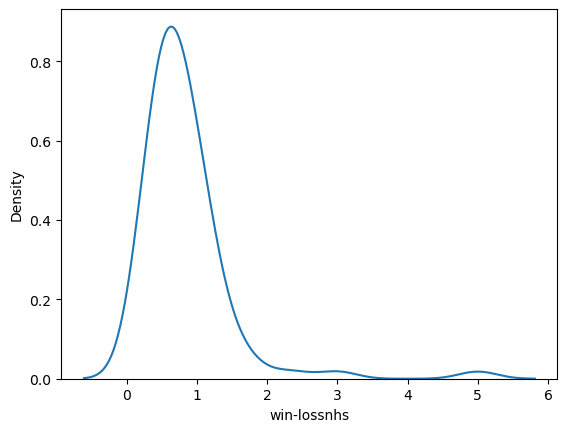

In [153]:
sns.kdeplot(data = teams1['win-lossnhs'])

<Axes: xlabel='winratehs', ylabel='Density'>

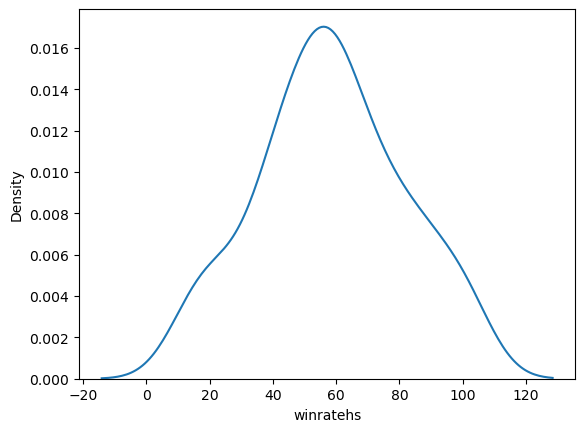

In [126]:
sns.kdeplot(data = teams1['winratehs'])

In [406]:
df['win%cs'] = (df['wincountcs']/df['matplayseason']).round(4)

In [490]:
homestatebias = df.loc[df['winner']=='Deccan Chargers',['season','city','win%cs']].drop_duplicates()

In [493]:
homestatebias.loc[homestatebias['win%cs']>0.1]

,season,city,win%cs
61,2009,Cape Town,0.1250
68,2009,Durban,0.1250
87,2009,Centurion,0.1250
103,2009,Johannesburg,0.1250
126,2010,Cuttack,0.1250
156,2010,Nagpur,0.1250
232,2011,Mumbai,0.1429
313,2012,Hyderabad,0.1333


In [494]:
homestatebias.loc[homestatebias['city'] == 'Hyderabad']

,season,city,win%cs
185,2011,Hyderabad,0.0714
313,2012,Hyderabad,0.1333


<Axes: xlabel='win%cs', ylabel='Count'>

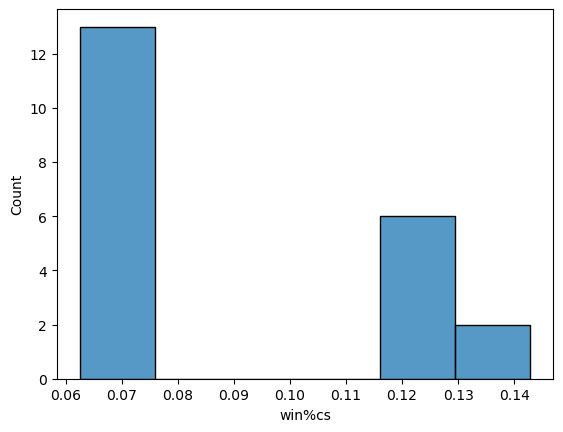

In [491]:
sns.histplot(data = homestatebias,x = 'win%cs')

<Axes: xlabel='win%cs', ylabel='Density'>

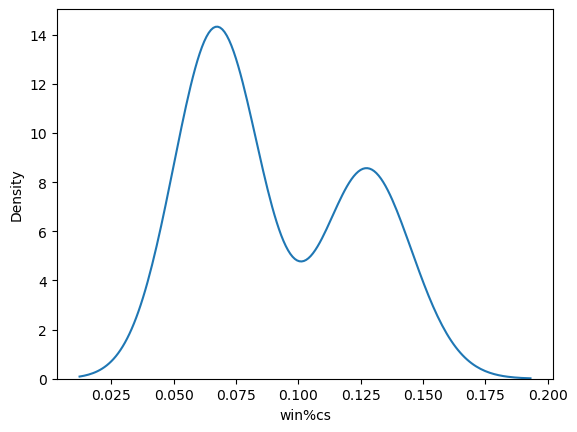

In [492]:
sns.kdeplot(data = homestatebias,x = 'win%cs')

In [ ]:
# Deccan Charges has home city bias

In [ ]:
#CSK,DDD,KXP,KKR,MI,RR,RCB,SRH -- All of them have home state advantage

In [515]:
playoffs = df.sort_values(['date'],ascending = [False]).groupby(['season']).head(4)

In [519]:
playoffs = playoffs[~playoffs['date'].isin(playoffs.loc[playoffs['season'].isin([2008,2009])].groupby('season')['date'].min())]

In [663]:
playoffteams = (pd.concat([playoffs[['season','team1']].drop_duplicates().rename(columns = {'team1':'team'}),
            playoffs[['season','team2']].drop_duplicates().rename(columns = {'team2':'team'})],axis = 0)).drop_duplicates()

In [698]:
playoffteams.groupby(['winner'])['season'].count().sort_values(ascending = False)

winner
Chennai Super Kings            10
Mumbai Indians                  9
Kolkata Knight Riders           6
Royal Challengers Bangalore     6
Sunrisers Hyderabad             6
Rajasthan Royals                4
Delhi Daredevils                3
Deccan Chargers                 2
Delhi Capitals                  2
Kings XI Punjab                 2
Gujarat Lions                   1
Rising Pune Supergiant          1
Name: season, dtype: int64

In [617]:
playoffteams.groupby(['season'])['team'].unique()

season
2008                   [Chennai Super Kings, Delhi Daredevils, Rajasthan Royals, Kings XI Punjab]
2009        [Royal Challengers Bangalore, Delhi Daredevils, Deccan Chargers, Chennai Super Kings]
2010          [Chennai Super Kings, Royal Challengers Bangalore, Mumbai Indians, Deccan Chargers]
2011    [Chennai Super Kings, Royal Challengers Bangalore, Mumbai Indians, Kolkata Knight Riders]
2012               [Kolkata Knight Riders, Delhi Daredevils, Chennai Super Kings, Mumbai Indians]
2013                 [Chennai Super Kings, Mumbai Indians, Rajasthan Royals, Sunrisers Hyderabad]
2014                [Kolkata Knight Riders, Chennai Super Kings, Kings XI Punjab, Mumbai Indians]
2015         [Mumbai Indians, Chennai Super Kings, Royal Challengers Bangalore, Rajasthan Royals]
2016     [Royal Challengers Bangalore, Gujarat Lions, Sunrisers Hyderabad, Kolkata Knight Riders]
2017         [Mumbai Indians, Sunrisers Hyderabad, Rising Pune Supergiant, Kolkata Knight Riders]
2018         

In [558]:
playoffs['stage'] = playoffs.groupby(['season'])['date'].transform('rank').astype('int32')

In [594]:
def winner(row):
    if row['team1'] == row['winner']:
        return row['season'],row['team2']
    else:
        return row['season'],row['team1']



(pd.DataFrame(playoffs[(playoffs['stage']==4)|((playoffs['stage']==3) & (playoffs['season'].isin([2008,2009])))]
                      .apply(winner,axis = 1).tolist(),columns = ['season','runner'])).sort_values(['season'],ascending=True)


,season,runner
12,2008,Chennai Super Kings
11,2009,Royal Challengers Bangalore
10,2010,Mumbai Indians
9,2011,Royal Challengers Bangalore
8,2012,Chennai Super Kings
7,2013,Chennai Super Kings
6,2014,Kings XI Punjab
5,2015,Chennai Super Kings
4,2016,Royal Challengers Bangalore
3,2017,Rising Pune Supergiant


In [654]:
wins = (df.loc[~df['date'].isin(playoffs['date'])].groupby(['season','winner'])['id'].count().reset_index()
        .rename(columns = {'id':'matcheswon'}))

In [ ]:
#above dataframe tells about the matcheswon by each team in each season excluding the playoff matches.

In [673]:
playoffteams = (wins[(wins['season'].astype('str')+wins['winner']).isin(playoffteams['season'].astype('str')+playoffteams['team'])]
                 .reset_index(drop=True))

In [ ]:
#adding matcheswon column to the playoffteams

In [674]:
playoffteams

,season,winner,matcheswon
0,2008,Chennai Super Kings,8
1,2008,Delhi Daredevils,7
2,2008,Kings XI Punjab,10
3,2008,Rajasthan Royals,11
4,2009,Chennai Super Kings,8
5,2009,Deccan Chargers,7
6,2009,Delhi Daredevils,10
7,2009,Royal Challengers Bangalore,8
8,2010,Chennai Super Kings,7
9,2010,Deccan Chargers,8


In [686]:
wins[~(wins['season'].astype('str')+wins['winner']).isin(playoffteams['season'].astype('str')+playoffteams['winner'])]

,season,winner,matcheswon
1,2008,Deccan Chargers,2
4,2008,Kolkata Knight Riders,6
5,2008,Mumbai Indians,7
7,2008,Royal Challengers Bangalore,4
11,2009,Kings XI Punjab,7
12,2009,Kolkata Knight Riders,3
13,2009,Mumbai Indians,5
14,2009,Rajasthan Royals,6
18,2010,Delhi Daredevils,7
19,2010,Kings XI Punjab,4


In [ ]:
#1) 2008 -NRR(DDD) > NRR(MI); 2009 -NRR(DC)>NRR(KXIP); 2010,2015 - 4 teams have 7 points; 2014 - NRR(MI)>NRR(RR);
#2020 - out of 3 teams who scored 7, KKR has lowest NRR; 2012 -out of 3 teams who scored 8, KXIP has lowest NRR;
#2019 - out of 3 teams who scored 6, SRH has hight NRR and got selected while KXIP again got rejected.

In [688]:
wins.pivot_table(index= 'winner',
                 columns = 'season',
                 values = 'matcheswon')

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
winner,,,,,,,,,,,,,
Chennai Super Kings,8.0,8.0,7.0,9.0,8.0,11.0,9.0,9.0,NaN,NaN,9.0,9.0,6.0
Deccan Chargers,2.0,7.0,8.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delhi Capitals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0
Delhi Daredevils,7.0,10.0,7.0,4.0,11.0,3.0,2.0,5.0,7.0,6.0,5.0,NaN,NaN
Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,4.0,NaN,NaN,NaN
Kings XI Punjab,10.0,7.0,4.0,7.0,8.0,8.0,11.0,3.0,4.0,7.0,6.0,6.0,6.0
Kochi Tuskers Kerala,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kolkata Knight Riders,6.0,3.0,7.0,8.0,10.0,6.0,9.0,7.0,8.0,8.0,8.0,6.0,7.0
Mumbai Indians,7.0,5.0,10.0,9.0,10.0,11.0,7.0,8.0,7.0,10.0,6.0,9.0,9.0


In [693]:
#few conclusions:
#1)A team has to win a mininum of 7 matches to qualify for playoffs.
#2)KXIP though being present in all seasons got quailified for playoffs only 2 times.KXIP NRR had been its blocker for 3 seasons


array(['Chennai', 'Kolkata', 'Mumbai', 'Jaipur', 'Delhi', 'Bangalore',
       'Hyderabad', 'Chandigarh', 'Visakhapatnam'], dtype=object)

In [679]:
df1[df1['winner'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [ ]:
#chisquaretest - to check if toss_decision and match output are related in anyway.

In [700]:
df['tosswinnerstatus'] = 1

In [703]:
df.loc[df['toss_winner']==df['winner'],'tosswinnerstatus'] = 'won'

In [706]:
df[df['tosswinnerstatus']==1] = 'lost'

In [707]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,season,matcheswon,matchesplayed,winpercent,matcheswonseason,matplayseason,win%season,wincountcs,win%cs,tosswinnerstatus
0,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost,...,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost
1,335983,Chandigarh,2008-04-19 00:00:00,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,2008,106,178,59.55,9,16,56.25,1,0.0625,won
2,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost,...,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost
3,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost,...,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost
4,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost,...,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost,...,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost
812,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost,...,lost,lost,lost,lost,lost,lost,lost,lost,lost,lost
813,1237178,Abu Dhabi,2020-11-06 00:00:00,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,...,2020,66,124,53.23,8,16,50.0,2,0.125,won
814,1237180,Abu Dhabi,2020-11-08 00:00:00,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,...,2020,19,33,57.58,9,17,52.94,2,0.1176,won
